<div class="alert alert-block alert-info">   

# BABS 502 Project  
#### Instructor: Martha Essak  

</div>

## Instructions and reminders for Jupyter notebooks

**Add markdown and code cells as needed to complete your project.** Please do not modify the headings of the sections.

Helpful notes abouts markdown in Jupyter to get you started:
* When you have a cell selected (by clicking on the white space to the left of the cell) in Command mode (blue box around the cell), press `a` or `b` to add a cell "above" or "below"
* In Command mode, press `d` twice to delete the cell. Press z to undo deleting a cell
* In Command mode, press `m` to change a code cell to a markdown cell, or press `y` to change a markdown cell to a code cell
* In Command mode, press `x` to cut cell, `c` to copy cell, and `v` to paste cell below the selected cell
  
* Double click a cell to enter Edit mode (green box around the cell), or press `Enter`
* Add two empty spaces at the end of a line to add a line break
* Press `shift + enter` to execute a cell to see either the formatted version (for a markdown cell) or to run the code (for a code cell). This will cause you to leave edit mode.
* Press `Ctrl + Shift + -` to split the current cell into two cells where the cursor is
* Press `Shift + m` to merge multiple cells. You can use `Shift + up arrow` or `Shift + down` arrow to select multiple cells.



[See cheat sheet for Markdown in Jupyter for more details](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd)

### Names of students:
Fill in student names below, then remove the highlighting by deleting the code style.  
<br>
Donnica Chick (19180223)  
Reshum Zubair (91807925) 
</code> 

---

## Table of Contents
[Project description](#Description)  
[Part A: Time plot, trying transformations/adjustments, creating training and test set](#PartA)  
[Part B](#PartB)  
[Introduction & Approach](#Introduction)  
[Exploratory Data Analysis](#EDA1)  
[Potential causes of patterns](#Causes)   
[Exponential Smoothing Model](#ETS)  
[ARIMA model](#ARIMA)  
[Comparison of models](#Compare)  
[Forecasts](#Forecast)  
[Discussion](#Discussion)  


[Appendix A: ETS Models](#AppendixA)  
[Appendix B: ARIMA Models](#AppendixB)

---

<div class="alert alert-block alert-info">   
<a id="Description"></a>

# Project description

**Objective**  

The main goal of this project is to develop a model to forecast monthly energy use for the Vancouver International Airport (YVR).  

<br>

**Introduction**  

Budget planning at YVR requires forecasting the cost of energy to operate the airport. An accurate forecast could help the YVR representatives negotiate more favourable contracts with energy suppliers.

<br>

**Data Available**  

Data was taken from 14 years of records from the YVR database. This data set includes information on date, energy use, temperature, terminal area, and number of passengers. Data have been aggregated by month into 168 records (14 years with 12 months each).  

<br>


| # | Variable | Definition |  
| :- | :- | :- |  
| 1 | month | Month and year, e.g.: Nov-98 |
| 2 | energy | Energy use measured in thousands of kilowatt hours (kWh) |
| 3 | mean.temp | Mean monthly temperature outside (degrees Celsius) |
| 4 | total.area | Total area of all terminals (sq. m.) |
| 5 | total.passengers | Total number of passengers in thousands |
| 6 | domestic.passengers | Total number of domestic passengers (traveling within Canada) in thousands |
| 7 | US.passengers | Total number of passengers traveling between Canada and the US in thousands |
| 8 | international.passengers | Total number of passengers traveling between YVR and countries other than Canada/US |


In this project, you will develop appropriate models, compare the models, and discuss advantages and limitations of each model. You should select the best model and use it to provide monthly forecasts for energy use for the next three years (January 2011 through December 2013).   
    </div>

---

<div class="alert alert-block alert-info">   

# Part A (3.5 marks)
## Time plot, trying transformations/adjustments, creating training and test set
### See Canvas submission called "Project: Part A" for detailed questions and points breakdown.
<a id="PartA"></a>  

</div>


### Import the data
Create a time series object of the energy use. See the steps on Canvas if you aren't sure how to create a time series object in R.

In [1]:
library(zoo)
library(fpp2)
data <- read.csv("Energy use at YVR.csv")


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

-- Attaching packages -------------------------------------------------------------------------------------- fpp2 2.5 --

v ggplot2   3.4.2      v fma       2.5   
v forecast  8.23.0     v expsmooth 2.3   






### Time plot (0.5 marks)
Create a time plot of the electricity use data. Prepare this plot as if for publication and upload the image to Canvas. You do not have to describe the plot.

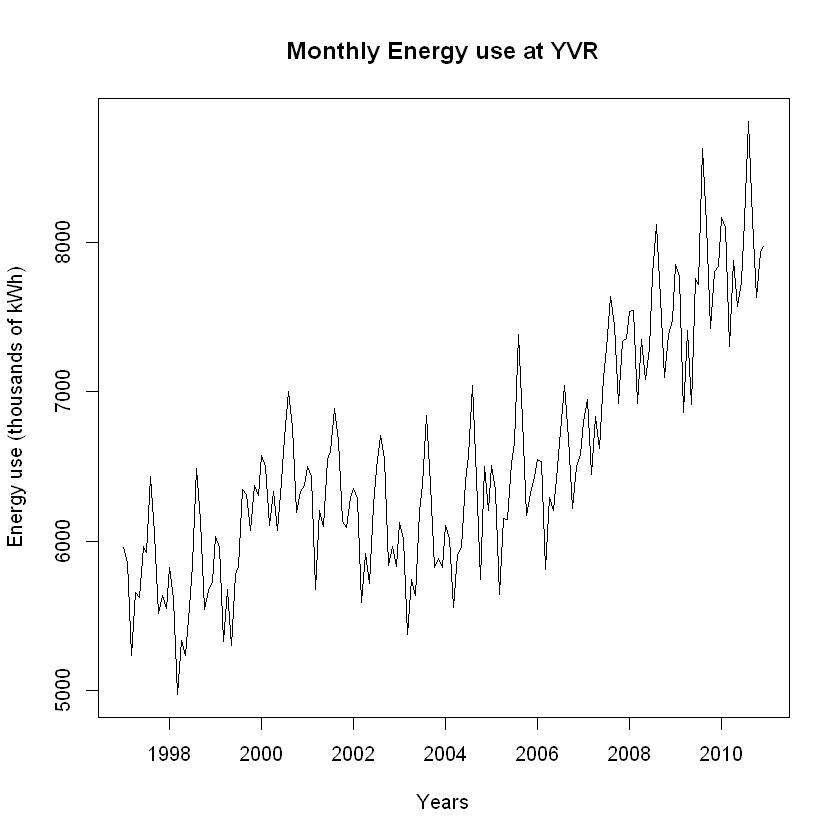

In [3]:
elecuse_ts = ts(data[,2], start = c(1997), frequency = 12)

plot(elecuse_ts, type = "l", col = "black", lwd = 1,
     main = "Monthly Energy use at YVR", xlab = "Years", ylab = "Energy use (thousands of kWh)")


### Box-Cox transformation (1 mark)
Write the code to do a Box-Cox transformation of the electricity use data (this will be submitted as part of the last question for Part A of the project).

Create a time plot of the transformed data. Prepare this plot as if for publication and upload the image.

Explain the purpose of using the Box-Cox transformation and if it was effective for this dataset (5 sentences max).

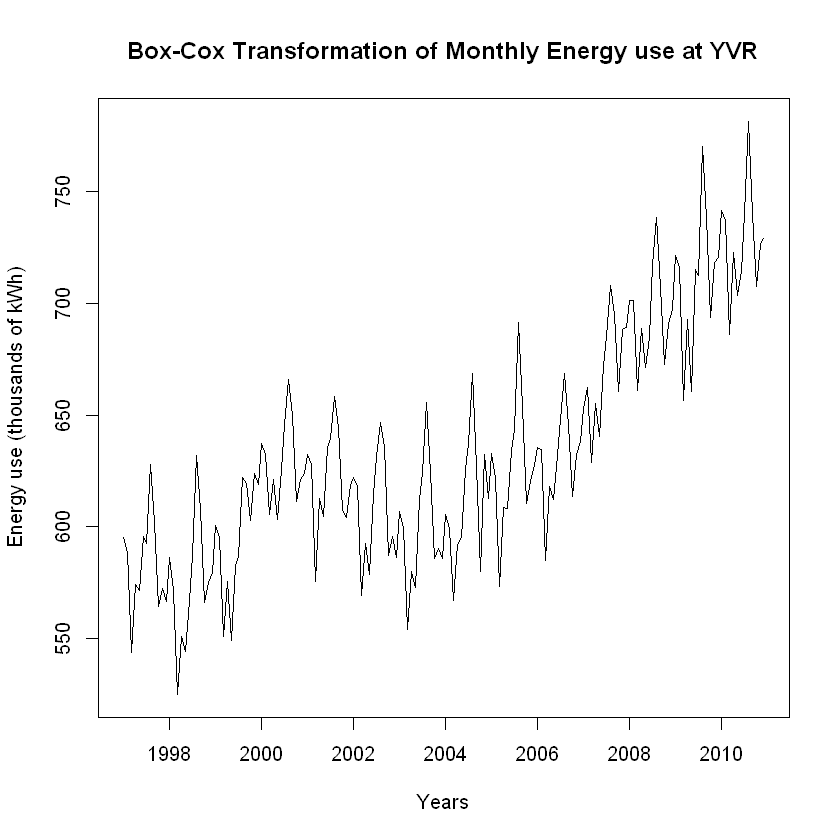

In [5]:
lambda <- BoxCox.lambda(elecuse_ts)
plot(BoxCox(elecuse_ts,lambda), xlab="Years", main = "Box-Cox Transformation of Monthly Energy use at YVR", 
     ylab = "Energy use (thousands of kWh)")

The Box-Cox transformation is used to stabilize the variance and make seasonal variation approximately equal. Visually we can see it is not effective for this dataset as there is not much of an effect after transformation. 


### Calendar adjustment for number of days in each month (1 mark)
Write the code to do a calendar adjustment based on number of days in each month for the electricity use data - use the original data, not the transformed data (this code will be submitted as part of the last question for Part A of the project).

Create a time plot of the calendar adjusted data. Prepare this plot as if for publication and upload the image.

Explain the purpose of using this calendar adjustment and if it was effective for this dataset (5 sentences max).

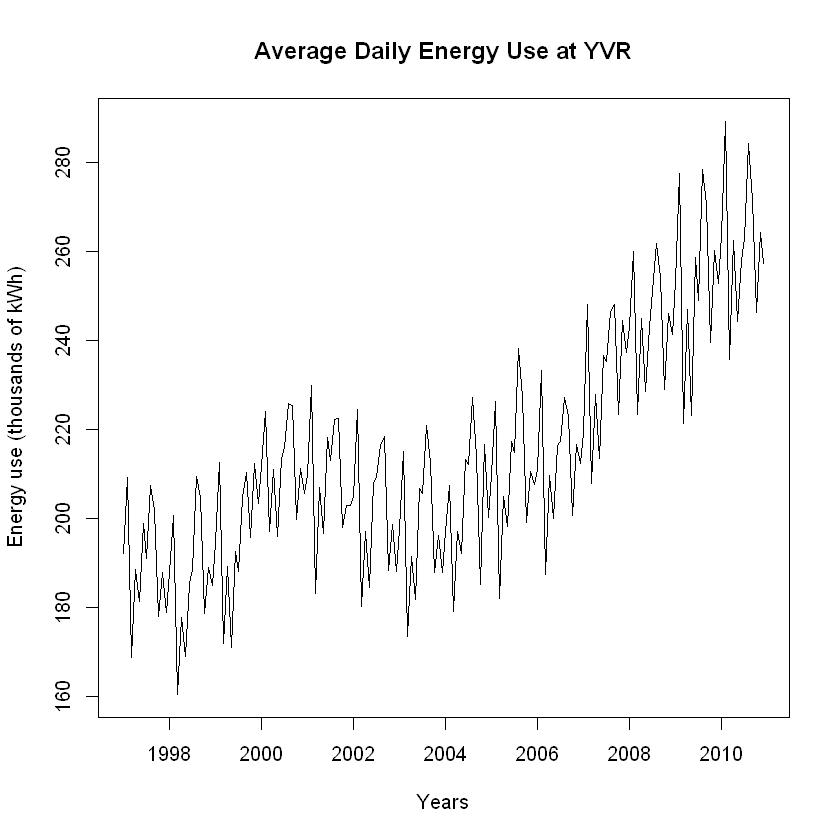

In [7]:
plot(elecuse_ts/monthdays(elecuse_ts), xlab="Years", main = "Average Daily Energy Use at YVR", 
     ylab = "Energy use (thousands of kWh)") #calendar adjustment


The purpose of using calendar adjustment is to remove variation due to calendar effects, and ensures more consistent data for comparison across time periods. This makes trends and seasonal patterns more visible. 

Is there a different calendar-related adjustment that you think would be more effective? Describe it and why you think it could be more effective (5 sentences max). Note: you do not have to write code or perform this adjustment. (0.5 marks)

Day-of-Week Adjustment: Airport operations and passenger traffic can vary between weekdays (business travel) and weekends (vacation travel), which can significantly impact electricity usage. Adjusting for this would remove day-specific variability and highlights consistent patterns.

Weather Adjustment: Extreme temperatures, rain, and snow can affect HVAC and ground operations, leading to spikes in energy demand. Normalizing for weather conditions helps focus on underlying trends and operational efficiencies outside of weather variability. 

### Divide the data into the training set and the test set (0.25 marks)
Write the code to create the training set and the test set. Show the code as your answer on Canvas.

In [9]:
train <- window(elecuse_ts, start=1997,end=c(2007, 12))
test <- window(elecuse_ts, start = 2008)

Upload your code to Canvas for Part A (0.25 marks)

----

<div class="alert alert-block alert-info">   

# Part B
### Note that Part B includes everything below this header
<a id="PartB"></a>  

</div>

<div class="alert alert-block alert-danger">
    
### Make sure that your code is organized and includes useful annotations and written descriptions of what you are seeing on plots or the conclusions that you are drawing. (0.5 marks)
  
### Prepare all plots for publication by including detailed axis labels.
    
### Complete anwers will include observations and conclusions/interpretations.
<div>

----

<div class="alert alert-block alert-warning">
<a id="EDA1"></a>

# Exploratory Data Analysis (300 words max.) (4 marks)  

Create plots of the electricity use data (**use all the data, not just the training set**); prepare them as if for publication and upload them. Include a decomposition plot from STL decomposition.  

Describe the characteristics of trend, cycle and seasonality in detail, referring to specific characteristics of the plots. Also mention any unusual features, if present. Be specific.  

<br>

Organize your answers as follows:  

Seasonality: ...  
    
Trend/cycle: ...  

Unusual features: ...  
</div>

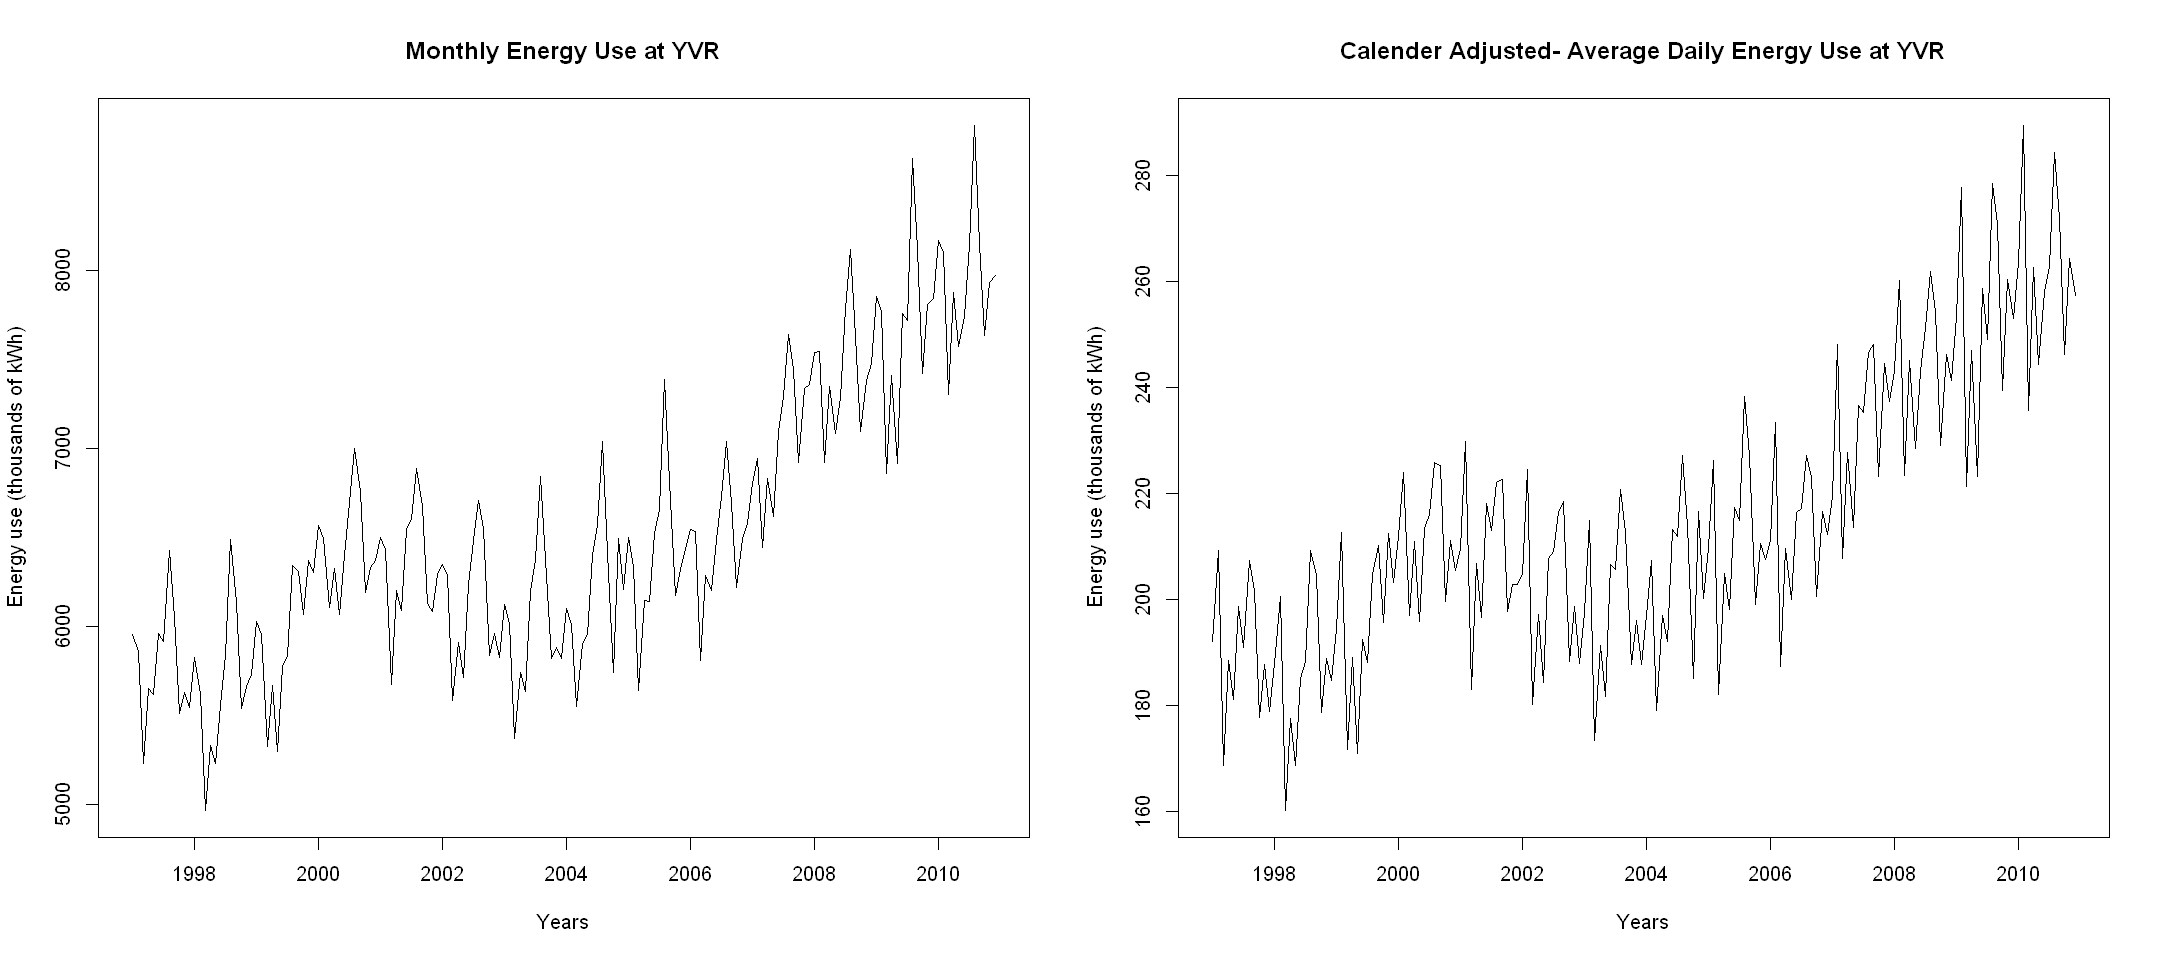

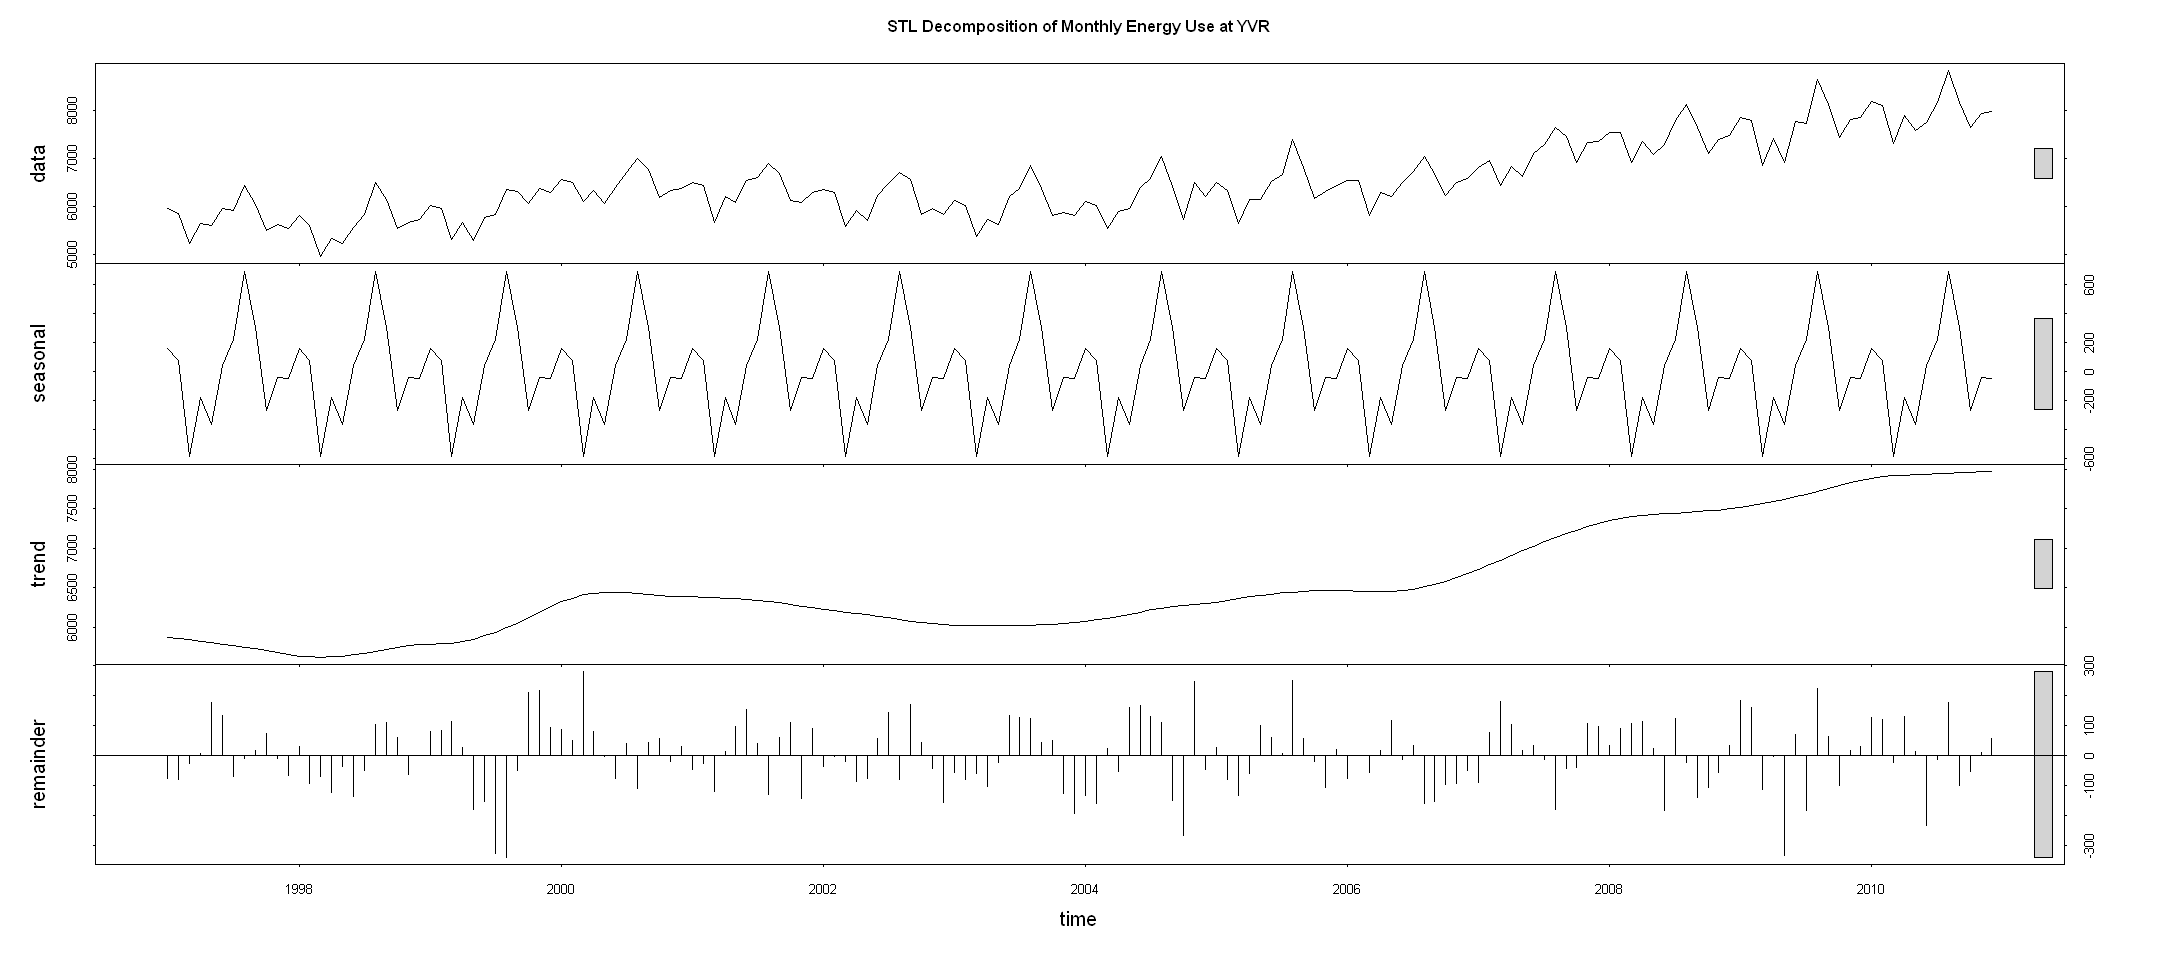

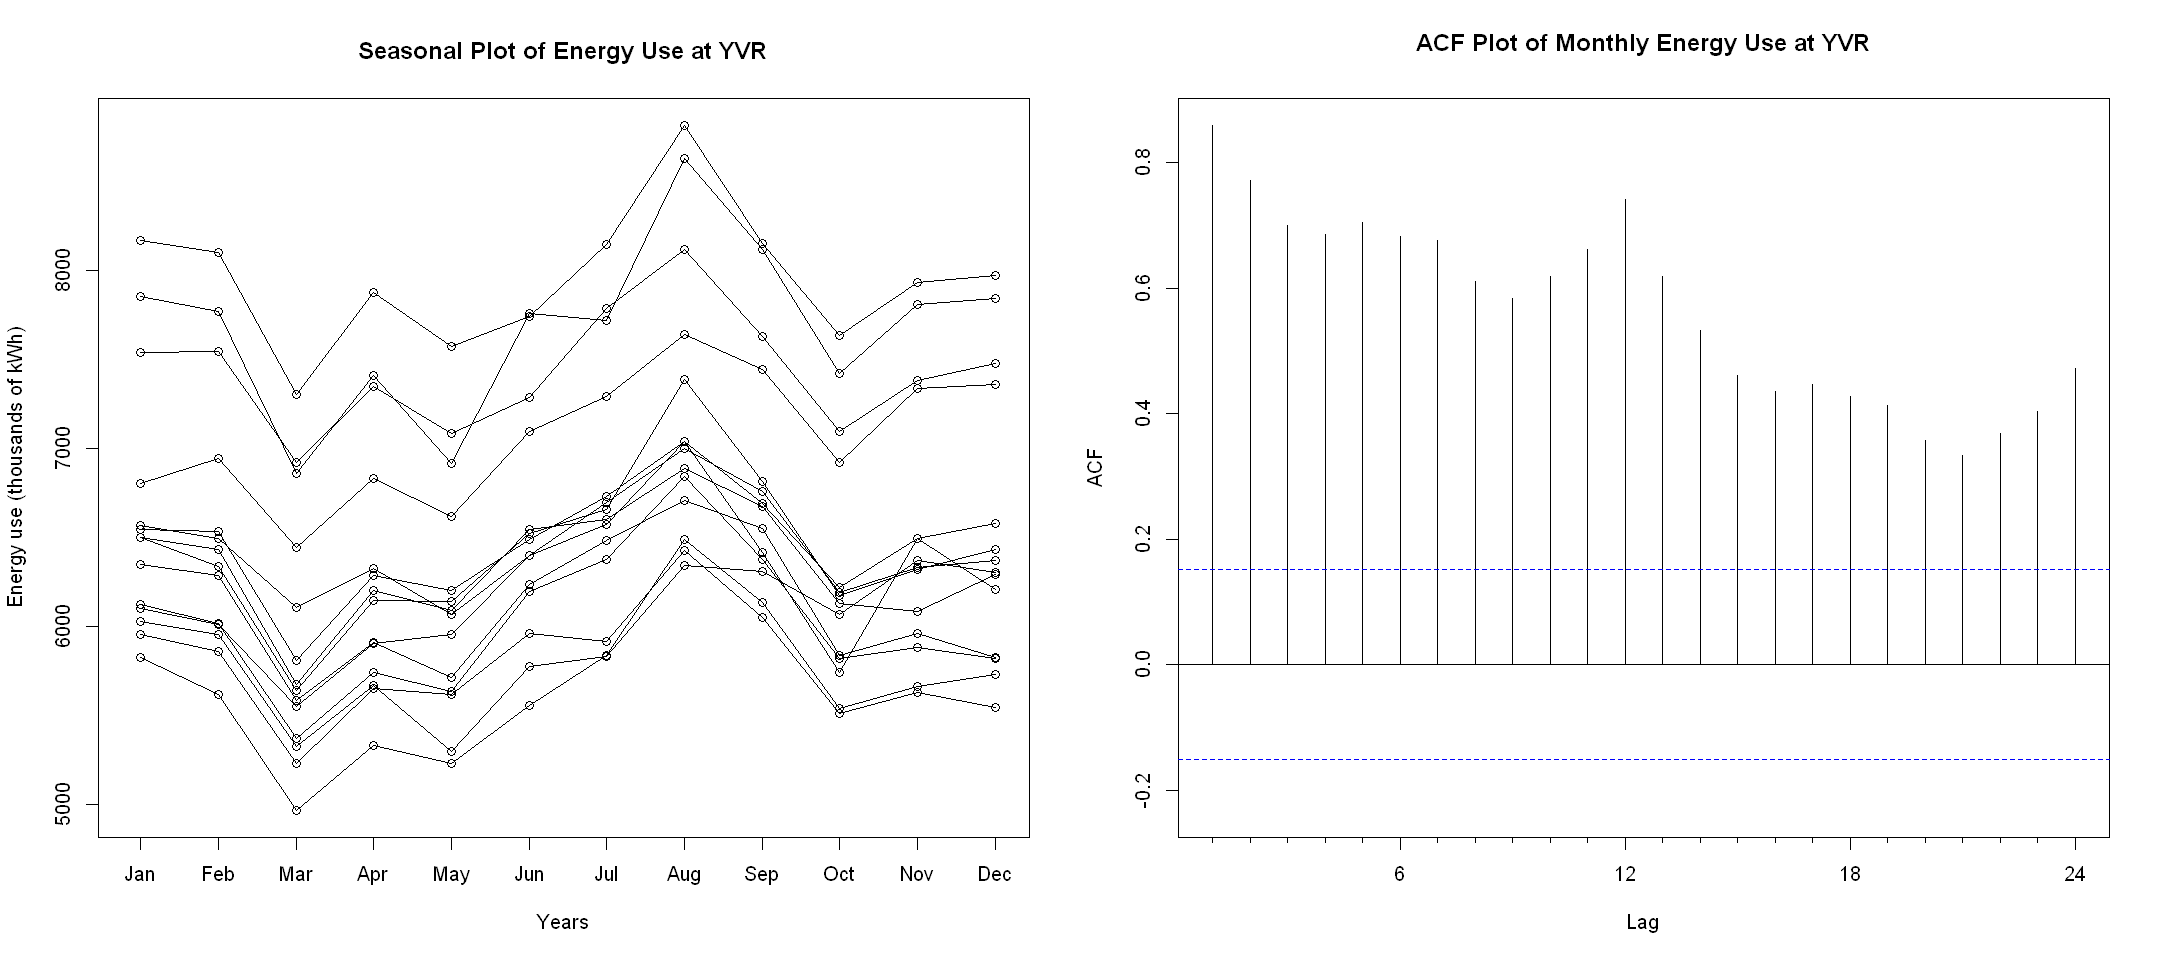

In [11]:
options(repr.plot.width=18, repr.plot.height=8)
par(mfrow = c(1, 2))

plot(elecuse_ts, type = "l", col = "black", lwd = 1,
     main = "Monthly Energy Use at YVR", xlab = "Years",
     ylab = "Energy use (thousands of kWh)")

# Calendar-Adjusted Average Daily Energy Use Plot
plot(elecuse_ts/monthdays(elecuse_ts), type = "l",
     main = "Calender Adjusted- Average Daily Energy Use at YVR",
     xlab = "Years", ylab = "Energy use (thousands of kWh)")

# STL Decomposition
stl_fit <- stl(elecuse_ts, s.window="periodic")
plot(stl_fit, main="STL Decomposition of Monthly Energy Use at YVR")

seasonplot(elecuse_ts, main = "Seasonal Plot of Energy Use at YVR",
     xlab = "Years", ylab = "Energy use (thousands of kWh)")

#  ACF Plot (Autocorrelation Function)
Acf(elecuse_ts, main="ACF Plot of Monthly Energy Use at YVR")


### Seasonality:
Looking at the seasonal plot becomes obvious that usage peaks every August and dips in March. Summer peaks reflect increased air traffic and increased air conditioning needs, while winter troughs highlight lower activity. The pattern repeats annually. Seasonal variance on the STL plot looks constant throughout data. 

### Trend/Cycle:
On the STL decomposition plot, we can see that electricity use steadily increased from 1997 to 2010. We also catch an important dip around 2000-2001, which could signal operational changes or economic impacts. It shows a flat period between 2003-2005, and then shows a steady increase with notable acceleration from 2006 onwards.


### Unusual Features:
The remainder component of the STL plot shows a sharp drop around 2000-2001, which may point to an external event (most likely the 9/11 attack) that significantly reduced flights at YVR. There was another significant drop in the remainder around 2009, likely due to economic impacts from the 2008 recession. There seems to be increased remainder variability after 2007, indicating potential external disruptions.



<div class="alert alert-block alert-warning">
<a id="Causes"></a>

# Potential causes (300 words max.) (3 marks)

Describe what could be causing the patterns that you are seeing in electricity use. Create any relevant plots and include them. Make sure to discuss any specific features of plots. Remember that the original dataset includes other variables! (300 words max.)  
</div>

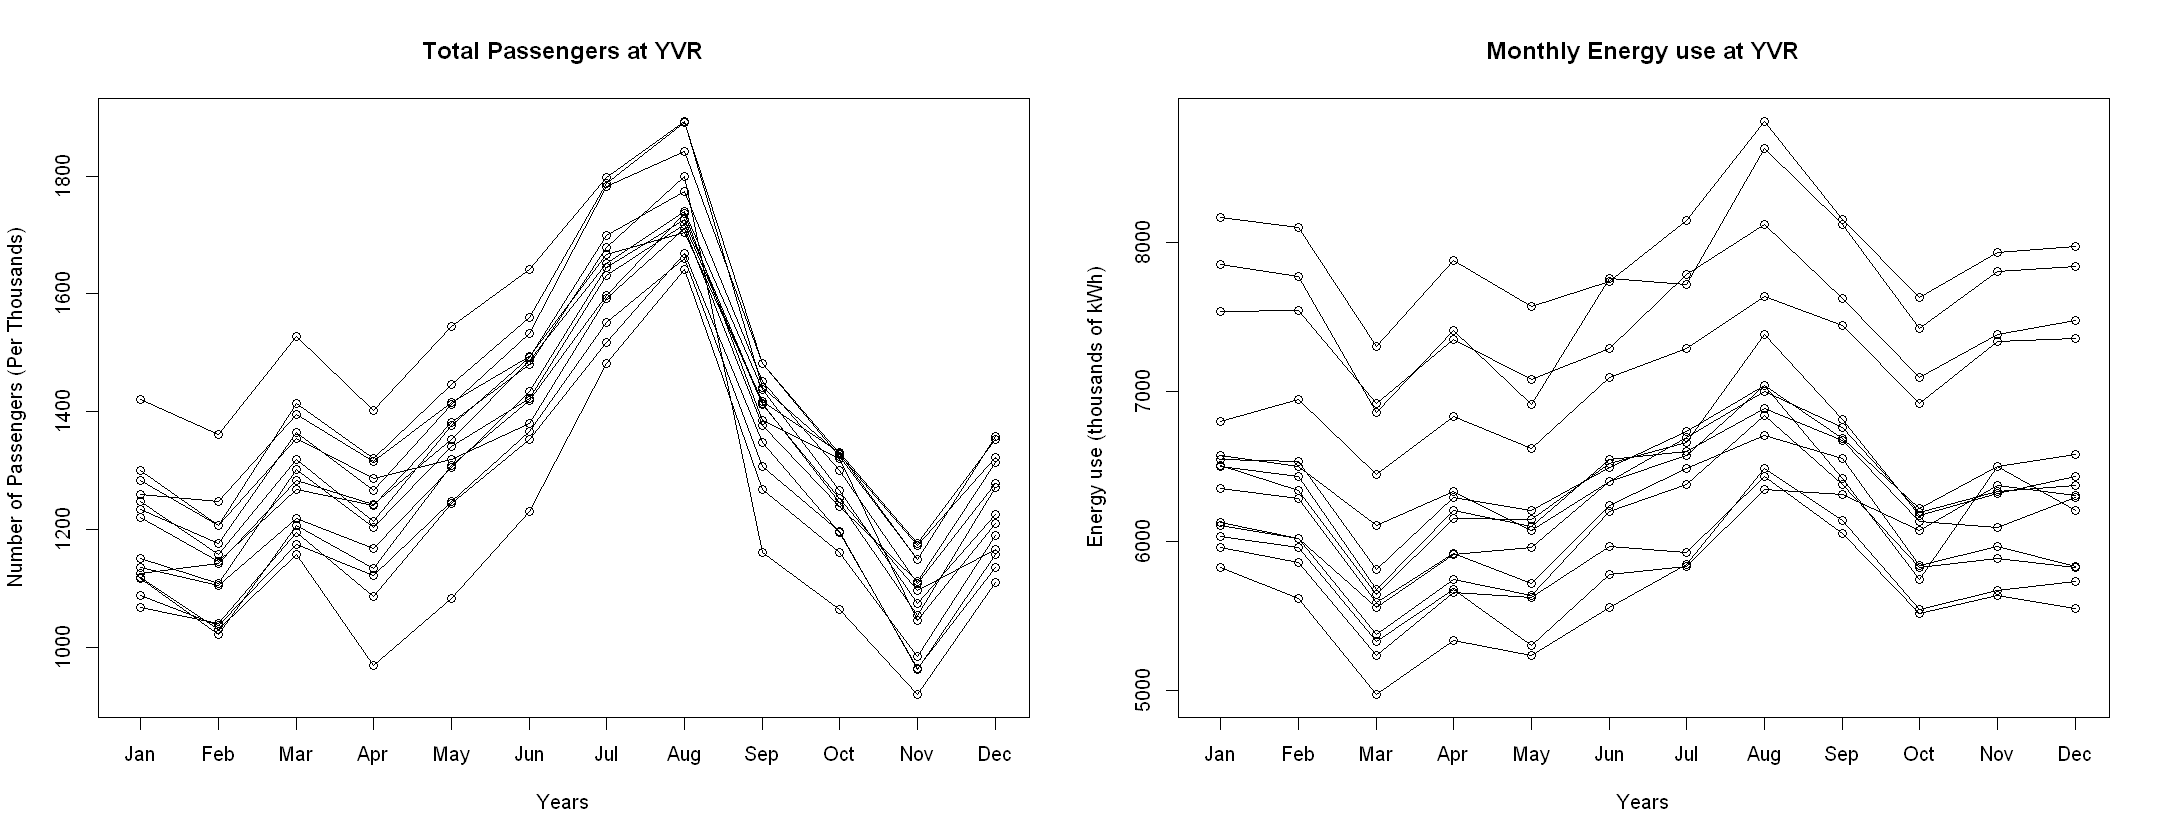

In [13]:
options(repr.plot.width=18, repr.plot.height=7)
par(mfrow = c(1, 2))
totalpass_ts = ts(data[,5], start = c(1997), frequency = 12)
seasonplot(totalpass_ts, xlab="Years", main = "Total Passengers at YVR", 
     ylab = "Number of Passengers (Per Thousands)") 
seasonplot(elecuse_ts, xlab="Years", main = "Monthly Energy use at YVR",
     ylab = "Energy use (thousands of kWh)") 


Passengers: We can see a obvious correlation between number of total passengers and energy use at YVR. On the passengers graph, we can see that August is clearly the peak travel month, which aligns exactly with the peak of energy use in August. November seems to be the least busy month, and November - April period have in general lower passenger traffic. This matches the lower energy usage in Feb-April months, the other months may be higher due to heating as we will take a look in the next graphs. 

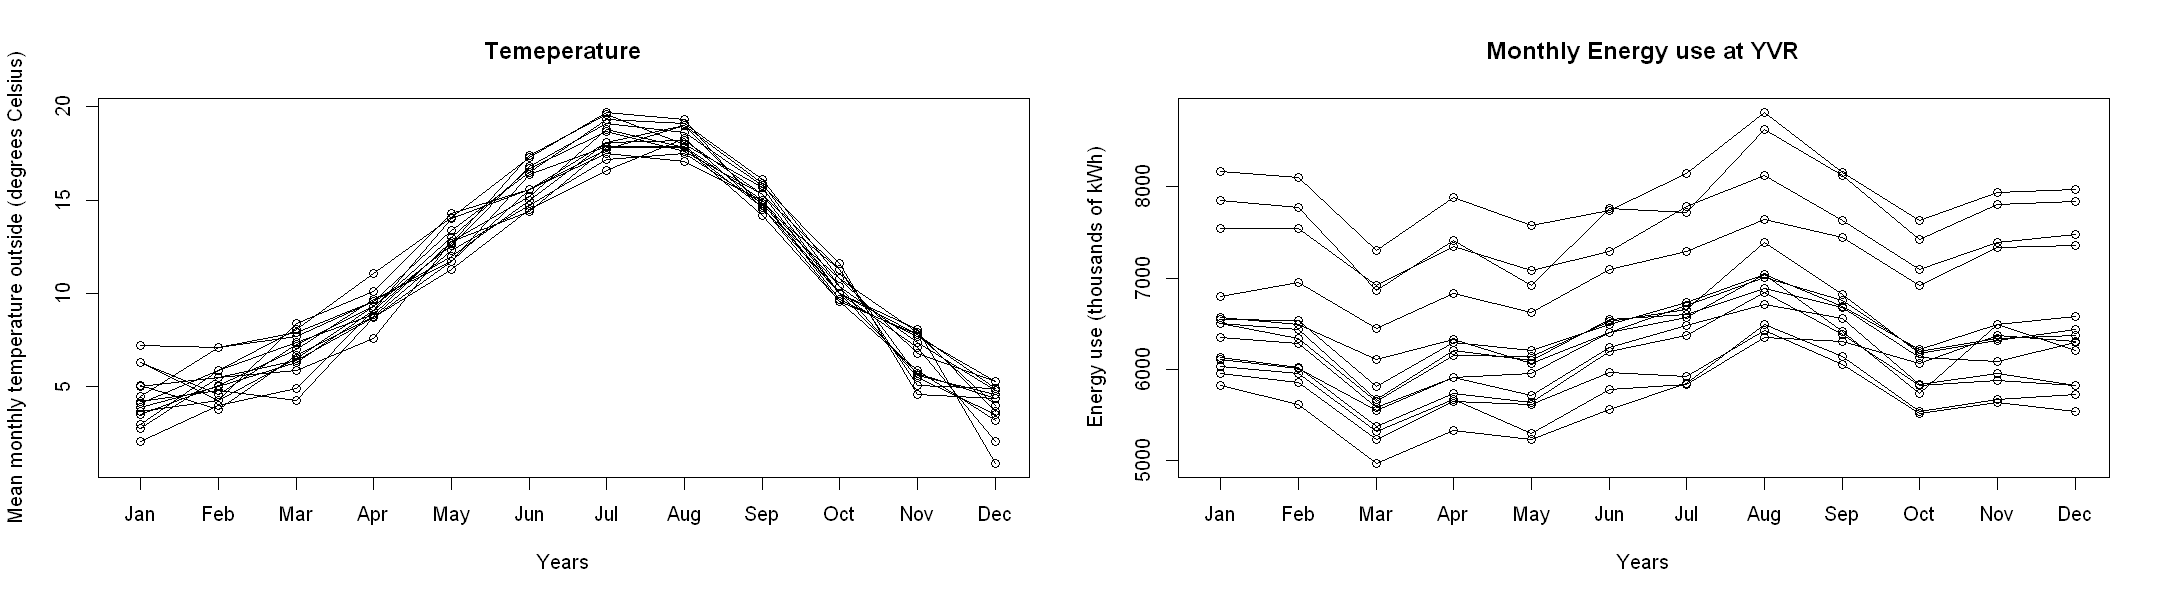

In [15]:
options(repr.plot.width=18, repr.plot.height=5)
par(mfrow = c(1, 2))
temp_ts = ts(data[,3], start = c(1997), frequency = 12)
seasonplot(temp_ts, xlab="Years", main = "Temeperature", 
     ylab = "Mean monthly temperature outside (degrees Celsius)") 
seasonplot(elecuse_ts, xlab="Years", main = "Monthly Energy use at YVR",
     ylab = "Energy use (thousands of kWh)") 

Temperature: Similar to the passsengers graph, there seems to be a correlation between temperature and energy usage at YVR. The hottest month is around July and August, which suggests they need more air conditioning leading to more energy use. For the winter months, Nov-Feb are the colder months, suggesting they need more energy to maintain heating, which may be why there isn't lower energy usage in those months even though there are less passengers. 

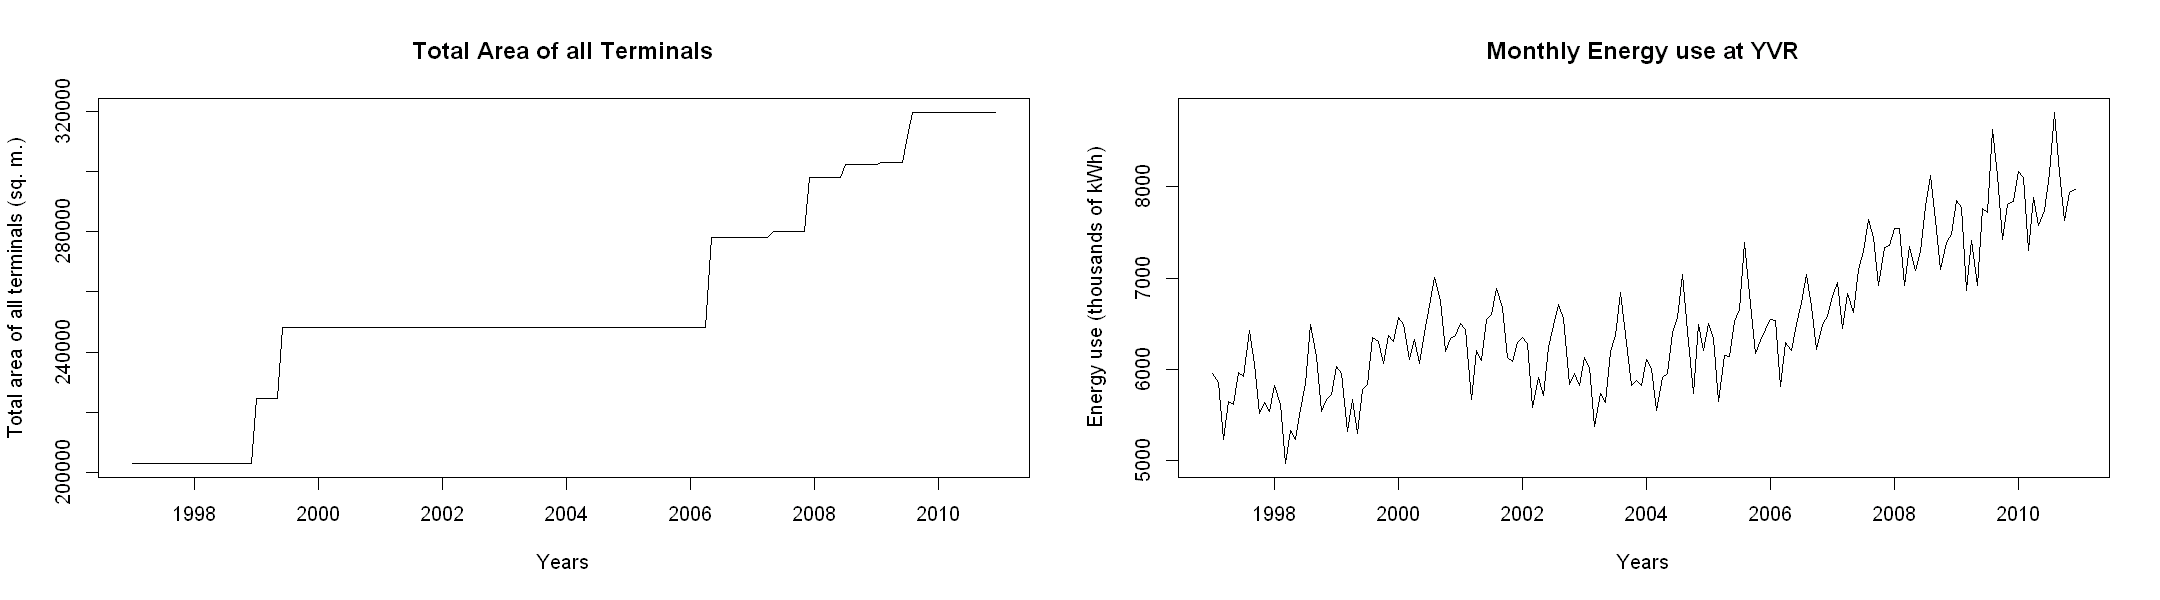

In [82]:
options(repr.plot.width=18, repr.plot.height=5)
par(mfrow = c(1, 2))
area_ts = ts(data[,4], start = c(1997), frequency = 12)
plot(area_ts, xlab="Years", main = "Total Area of all Terminals", 
     ylab = "Total area of all terminals (sq. m.)") 
plot(elecuse_ts, xlab="Years", main = "Monthly Energy use at YVR",
     ylab = "Energy use (thousands of kWh)") 


YVR Terminal Area: We can see that YVR expands in size overtime by looking at the total area of all their terminals. They most notably increased area around 1999 and 2006. On the energy graph, we can see that there is a small increasing trend around 1999 and a more obvious increase in trend at around 2006, aligning exactly with the expansion of terminals. 

Conclusion: 
Temperature is a key driver of seasonal energy patterns—cooling in summer and heating in winter. The energy peaks in summer are amplified by increased passenger traffic. Meanwhile, winter peaks highlight the role of heating demand, even when passenger numbers are lower. Overall trend matches with the expansion of terminals at YVR. 

----

<div class="alert alert-block alert-success">
<a id="Basic"></a>

# Basic forecasting methods
</div>  

Use the basic methods we have learned to develop forecasts for the test set. Plot in the following colours:  

mean method (blue)  
drift method (green)  
naïve method (red)  
seasonal naïve method (purple)  

 
## Visual comparison and assessment of basic methods (1.25 marks)

Plot the training set and test set data in black. Include the forecasts of the test set for each of the basic forecasting methods in a different colour (colours are given above) with a legend to explain.  

Prepare the plot for publication and upload it.

 

From a visual assessment, which of the basic forecasting methods seems to produce the best forecasts of the test set? Discuss briefly. (4 sentences max.)  
    

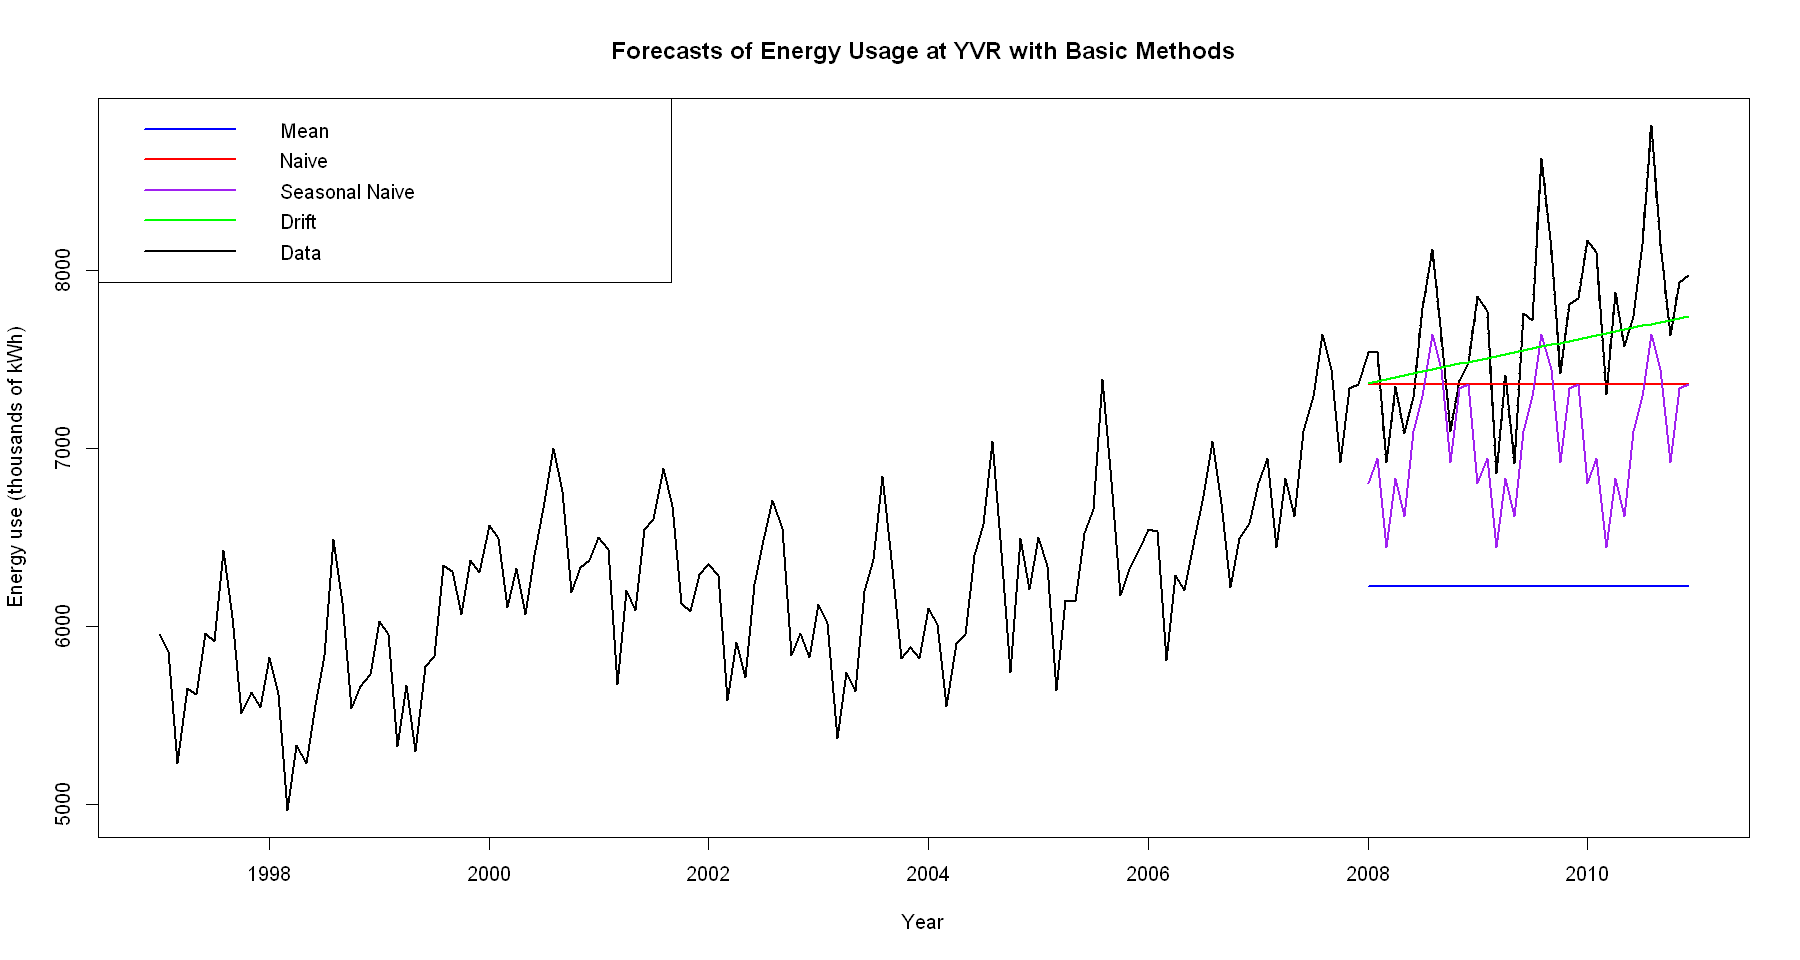

In [18]:
options(repr.plot.width=15, repr.plot.height=8)

plot(elecuse_ts, main = "Forecasts of Energy Usage at YVR with Basic Methods",
     ylab = "Energy use (thousands of kWh)", xlab = "Year",
     col = "black", lwd = 2)
lines(train, col = "black", lwd = 2)       
lines(test, col = "black", lty = 2, lwd = 2)

# Forecast using mean method
mean_fc <- meanf(train, h = length(test))
lines(mean_fc$mean, col = "blue", lwd = 2)  

# Forecast using naive method
naive_fc <- naive(train, h = length(test))
lines(naive_fc$mean, col = "red", lwd = 2)  

# Forecast using seasonal naive method
snaive_fc <- snaive(train, h = length(test))
lines(snaive_fc$mean, col = "purple", lwd = 2) 

# Forecast using drift method
drift_fc <- rwf(train, drift = TRUE, h = length(test))
lines(drift_fc$mean, col = "green", lwd = 2)   

# legend
legend("topleft", lty = 1, col = c("blue", "red", "purple", "green", "black"),
       legend = c("Mean", "Naive", "Seasonal Naive", "Drift", "Data"),
       lwd = 2)

From visual observation, the best model seems to be the drift model because it actually captures the trend, on average it looks to fit the test set the best. But the seasonal naive model also looks like it really captures the seasonality, but is completely missing the trend component making it quite inaccurate. 

## Accuracy measures (0.5 marks)
Create a table with the RMSE, MAE, MAPE, and MASE for the test set for each of the four basic methods. Round values to 1 decimal place.

In [20]:
mean_accuracy <- accuracy(mean_fc, test)
naive_accuracy <- accuracy(naive_fc, test)
snaive_accuracy <- accuracy(snaive_fc, test)
drift_accuracy <- accuracy(drift_fc, test)

results <- rbind(
  `Mean Method` = mean_accuracy["Test set", c("RMSE", "MAE", "MAPE", "MASE")],
  `Naive Method` = naive_accuracy["Test set", c("RMSE", "MAE", "MAPE", "MASE")],
  `Seasonal Naive Method` = snaive_accuracy["Test set", c("RMSE", "MAE", "MAPE", "MASE")],
  `Drift Method` = drift_accuracy["Test set", c("RMSE", "MAE", "MAPE", "MASE")]
)

results <- round(results, 1)

print(results)

                        RMSE    MAE MAPE MASE
Mean Method           1528.5 1463.8 18.8  5.5
Naive Method           550.1  443.2  5.6  1.7
Seasonal Naive Method  698.7  626.8  8.0  2.4
Drift Method           416.0  328.5  4.2  1.2


## Comparison of basic methods (1 mark)
Based on the accuracy measures for the test set, which of the basic forecasting methods seems to forecast the test set the best? Interpret the MASE for this method. (4 sentences max.) 

### Answer:

**<font color='red'>The drift method forecasts the test set the best</font>**,It produces the lowest RMSE (416.0), MAE (328.5), MAPE (4.2%), and MASE (1.2), indicating it has the highest accuracy. **The low MASE value of 1.2 indicates that the drift method’s forecasting errors are only slightly higher than the average one-step-ahead naïve forecast errors on the training set**. Since a MASE close to 1 suggests performance comparable to a naïve forecast, this value indicates that the Drift Method is only slightly more error-prone than the simplest forecast model but outperforms the others on all metrics.

----

<div class="alert alert-block alert-success">
<a id="ETS"></a>

# Exponential Smoothing (ETS) model

Fit ETS models to the training set. Find your best model and present it here. Include any other models you tried in **Appendix A**.
    
</div>    

## What is the model, using the ETS(__, __, __) notation? (0.25 marks)

ETS(M,A,A)

## What are the estimates of the smoothing parameters? (0.25 marks)

In [22]:
etsmodel <- ets(train, model ="MAA")
alpha <- etsmodel$par["alpha"]
beta <- etsmodel$par["beta"]
gamma <- etsmodel$par["gamma"]
cat("Level Smoothing (Alpha):", alpha, "\n")
cat("Trend Smoothing (Beta):", beta, "\n")
cat("Seasonal Smoothing (Gamma):", gamma, "\n")

Level Smoothing (Alpha): 0.8082175 
Trend Smoothing (Beta): 0.0001031903 
Seasonal Smoothing (Gamma): 0.0001203417 


## Explain why this model is appropriate based on the features of the data. (4 sentences max.) (1.5 marks)

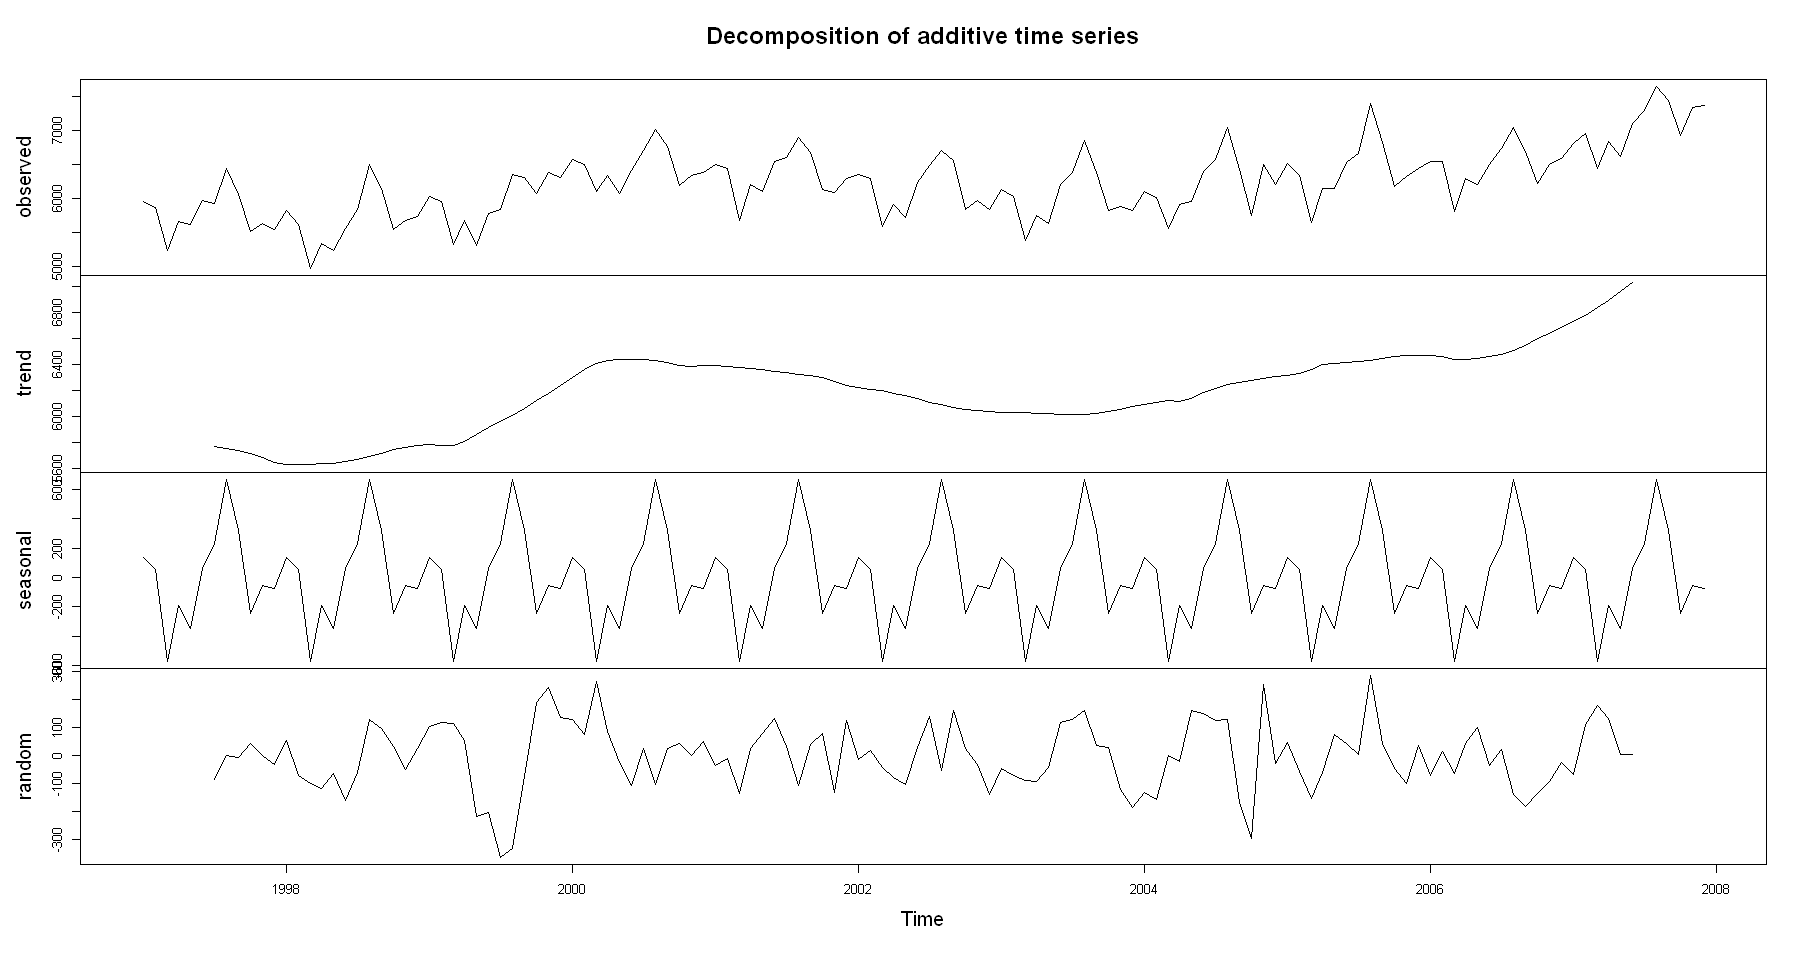

In [24]:
plot(decompose(train))

This model is approriate by looking at the decomposition graph. 

First we can see a linear positive trend, this mean there is an additive trend and should be A for the trend component. 

Second we can see there is seasonality and the variance is constant, meaning it is additive seasonality and should be A for the seasonality component. 

Thirdly, the errors fluctuate a lot and is less clear to see if its additive or multiplicative. 

## Model plot (0.75 marks)

Create a time plot of the data in black with a gap between the training set and test set data.

Show the fitted values of the model graphed in blue. Show the forecasts for the test set with a bold blue line and the 80% and 95% prediction intervals as shaded regions.

Prepare this plot for publication and upload it.

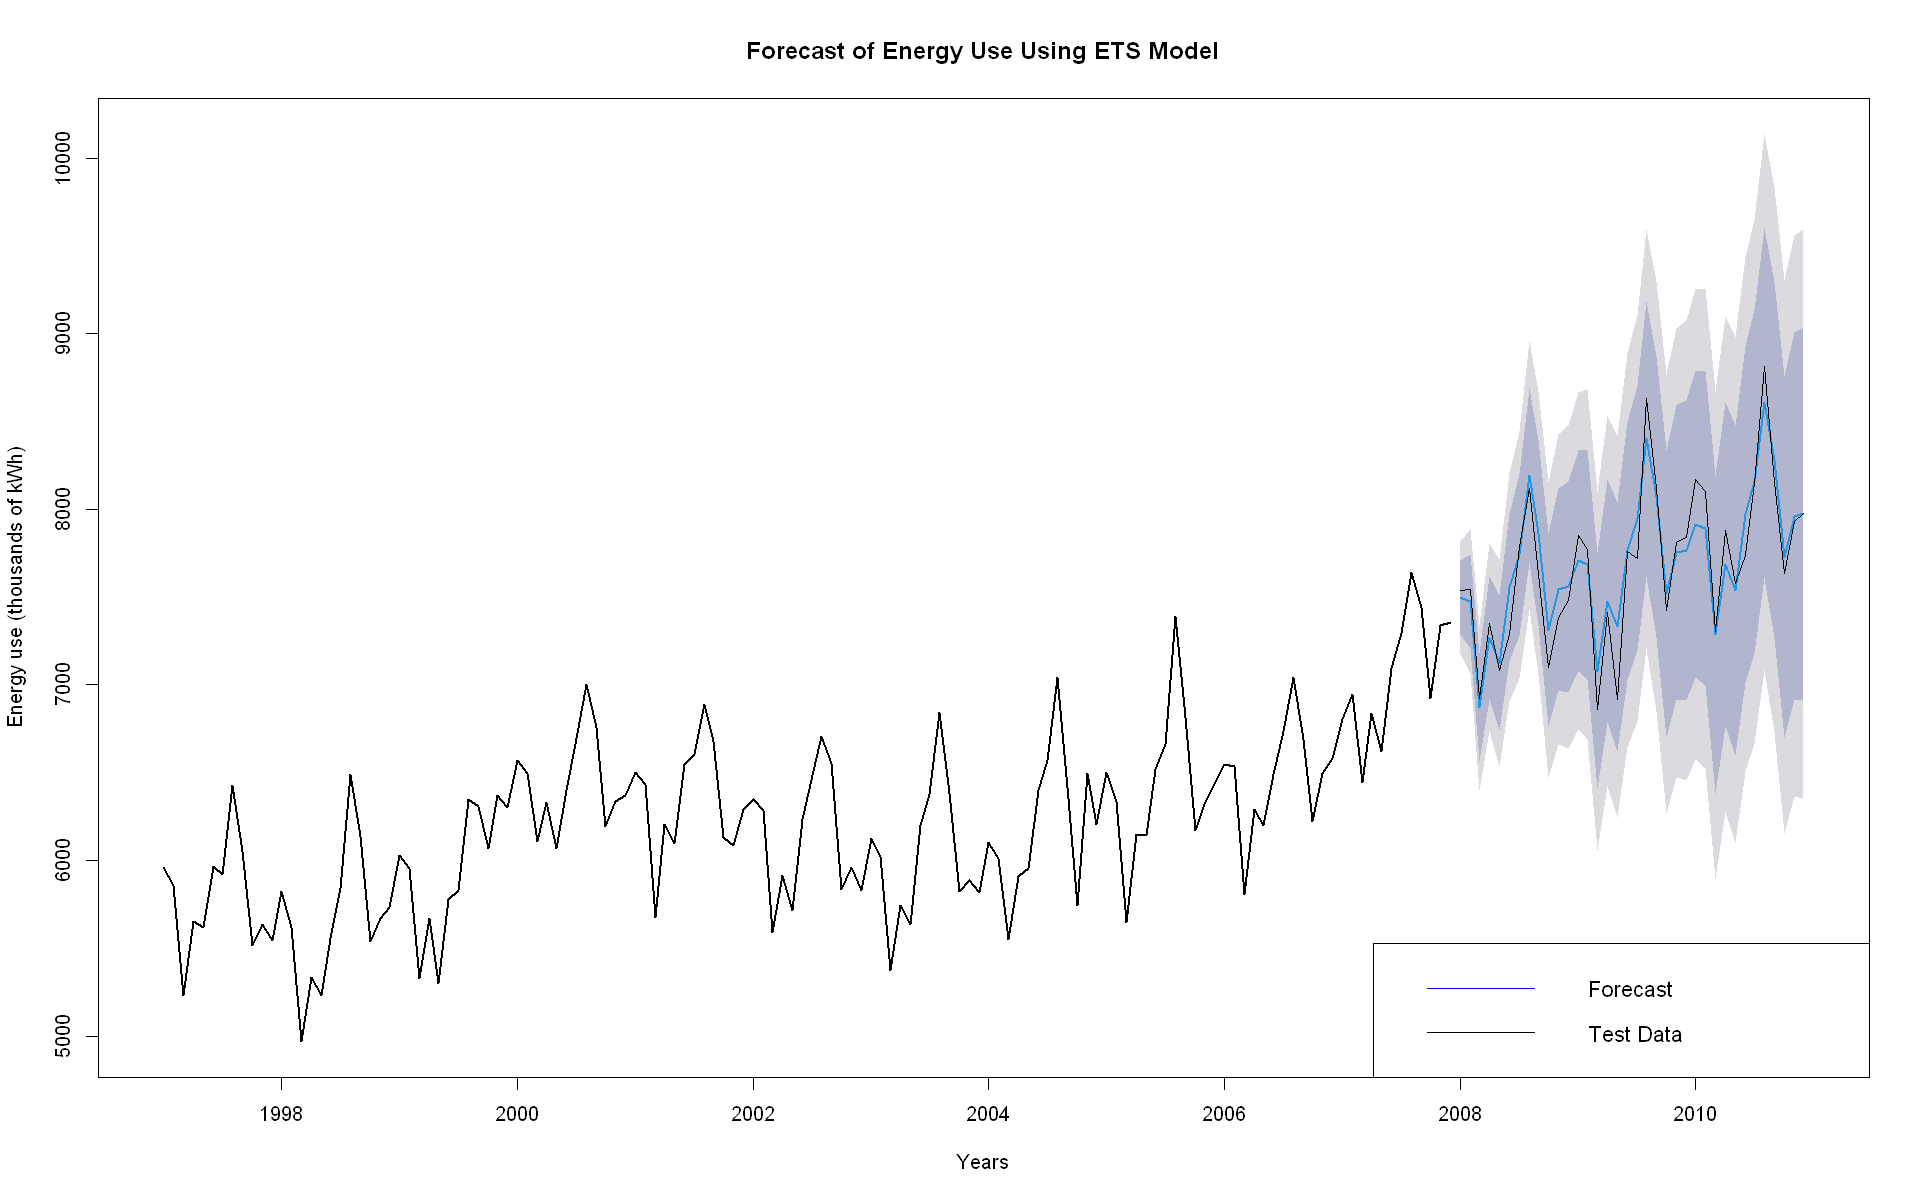

In [26]:
options(repr.plot.width=16, repr.plot.height=10)
plot(forecast(etsmodel, length(test)), xlab="Years", main = "Forecast of Energy Use Using ETS Model", 
     ylab = "Energy use (thousands of kWh)", lw = 2)
lines(test)
legend("bottomright", legend=c("Forecast", "Test Data"), col=c("blue", "black"), lty=1, cex=1.1)

## Goodness of fit (1 mark)

Quantify and discuss the goodness of fit of the model to the training set. You can compare this model to other ETS models that you tried. (Present any values, then 4 sentences max.)

In [28]:
etsauto <- ets(train)
ets1 <- ets(train, model ="AAA")
ets2 <- ets(train, model ="MAA")
method <- c("1. Auto", "2. AAA", "3. MAA")
AICc <- c(etsauto$aicc, ets1$aicc, ets2$aicc)
etstraintable <- cbind(method, round(rbind(accuracy(forecast(etsauto, length(test)), test)[2,c(2,3,5,6)], 
accuracy(forecast(ets(train, "AAA"), length(test)), test)[1,c(2,3,5,6)],
accuracy(forecast(etsmodel, length(test)), test)[1,c(2,3,5,6)]
), 2),AICc)

etstraintable

method,RMSE,MAE,MAPE,MASE,AICc
1. Auto,386.41,315.94,4.01,1.19,1956.80820704385
2. AAA,126.26,98.96,1.59,0.37,1961.22361586491
3. MAA,126.37,99.44,1.6,0.38,1962.99630097688


It is clear that the ETS model R generates does much worse than the two manual models, AAA and MAA. The difference between the AAA and MAA model is quite small for the training set, with the AAA model having a slightly better fit towards the training set because of its lower errors across the board. But as we see later, the MAA model actually does better on the test set and the reason we picked it. 

## Accuracy measures (0.5 marks)
Calculate the accuracy measures (RMSE, MAE, MAPE, MASE) to show how well the model forecasts for the test set.

In [30]:
round(accuracy(forecast(etsmodel, length(test)), test)[2,c(2,3,5,6)], 2)

RMSE    MAE   MAPE   MASE 
155.98 123.18   1.61   0.46

## Accuracy of forecasts (1 mark)
Discuss how well this model forecasts the test set based on any plots or values that you calculated in previous questions. Remember that you can compare it to the basic methods. (4 sentences max.)

The ETS model forecasts the test set with relatively low error and suggests its performing well. RMSE of 155.98 and MAE of 123.18 is relatively low, considering the scale of the data, and the MAPE of 1.6% indicates the model is making accurate predictions. The MASE is below 1, indicating the model outperforms the naive model and we can see it performs much better than even the "best" basic model, the drift method. 

## Residual diagnostics (3.5 marks)

a) Calculate the mean of the residuals. Does this value indicate bias? (0.5 marks)  
b) Use the checkresiduals() function. Which properties of residuals have been met or not met according to these plots? (2 marks)  
c) Interpret the results of a portmanteau test for autocorrelations. Clearly state the hypotheses, the number of lags tested, the test statistic, p-value, decision, and concluding sentence. (1 mark)  

In [32]:
paste("Mean of Residuals=", round(mean(residuals(etsmodel)),4))

[1] "Mean of Residuals= -0.001"

a) The mean of residuals is essentially 0, indicating no bias. 


	Ljung-Box test

data:  Residuals from ETS(M,A,A)
Q* = 12.469, df = 24, p-value = 0.9741

Model df: 0.   Total lags used: 24



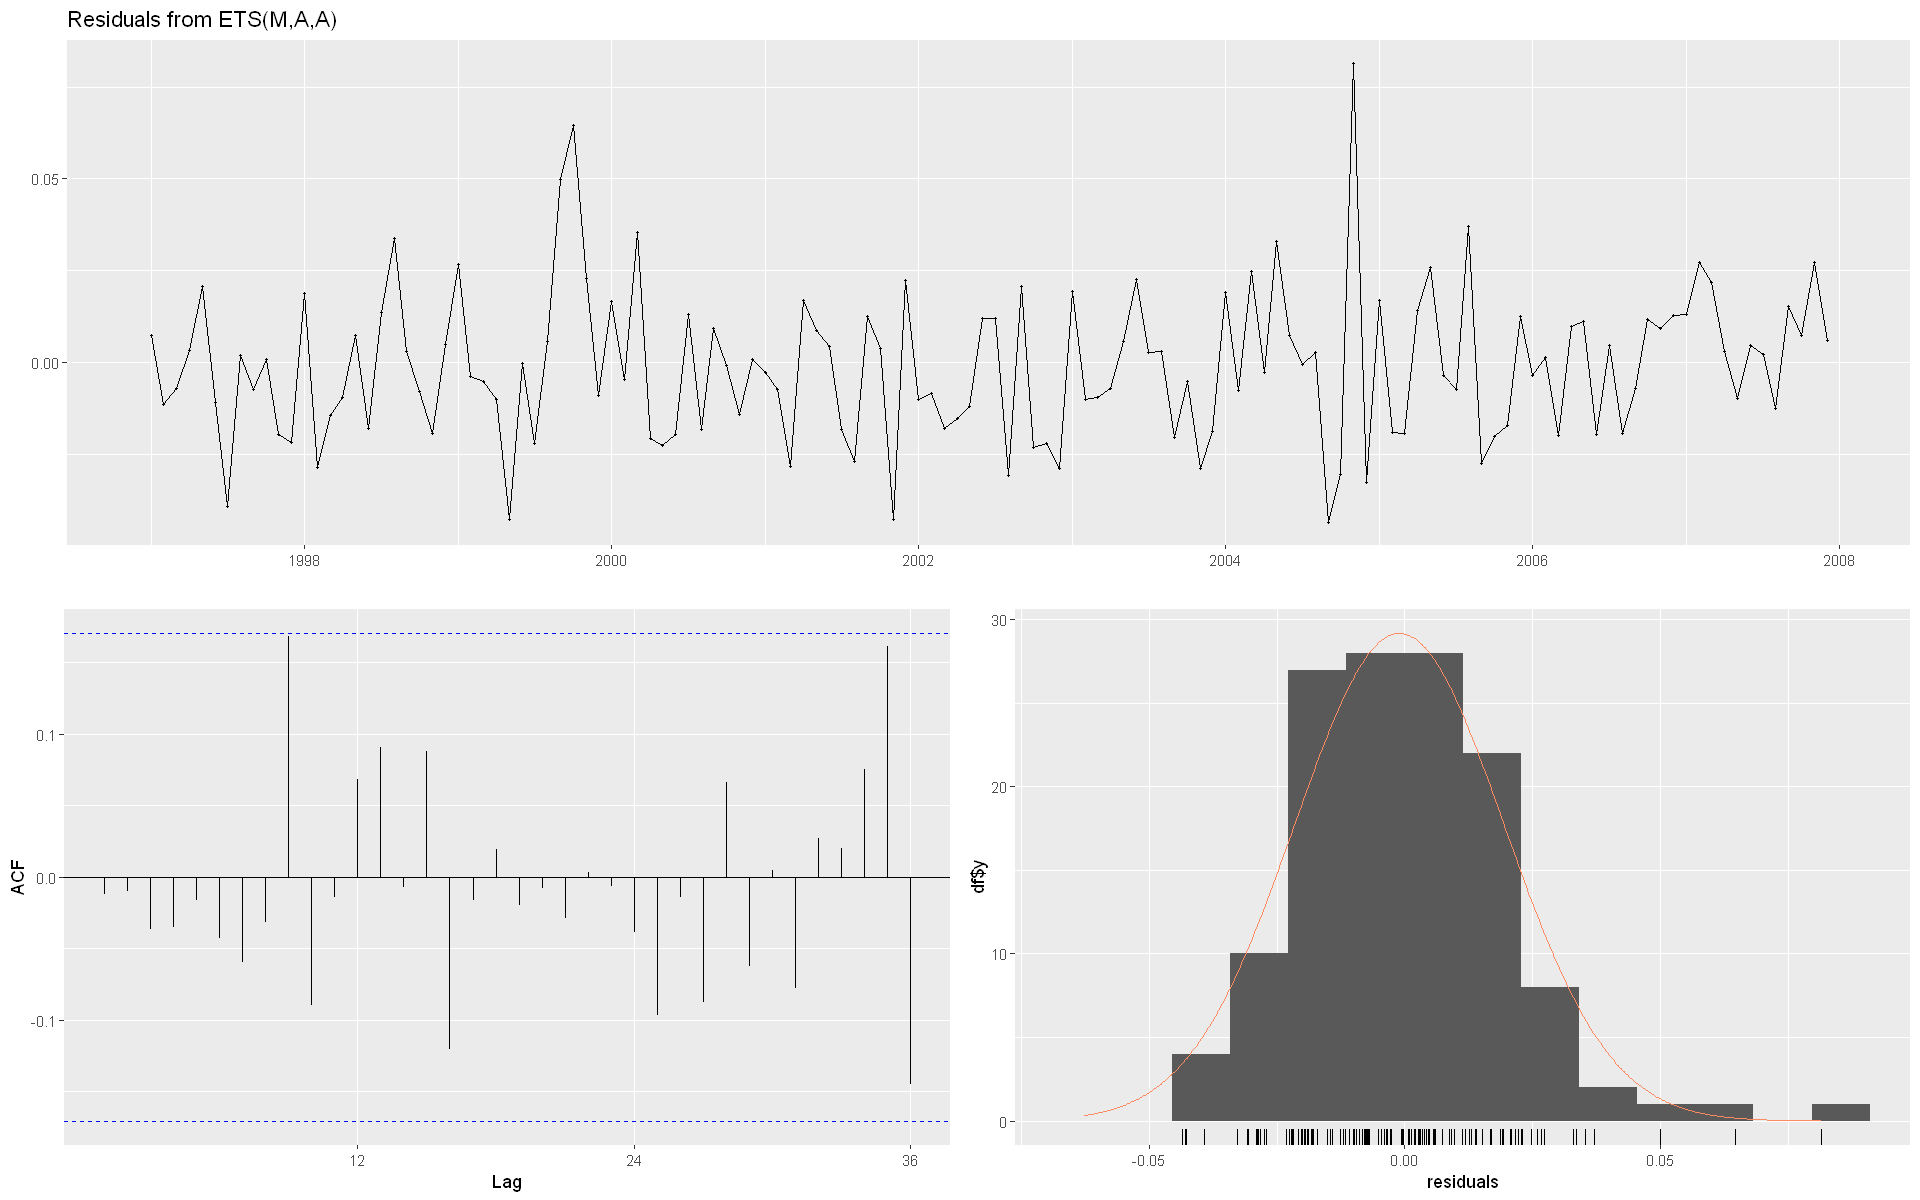

In [34]:
checkresiduals(etsmodel) 

b) The mean of the residuals was close to 0, meaning it meets the 0 mean requirement. On the ACF, we can see there are no significant spikes, meaning there is no autocorrelation. The variance seems mostly constant throughout the data. The distribution of the residuals looks normally distributed. 

In [36]:
Box.test(residuals(etsmodel), type="Ljung", lag=12) # Box-Ljung test


	Box-Ljung test

data:  residuals(etsmodel)
X-squared = 7.3076, df = 12, p-value = 0.8366


c) Hypothesis: There is no autocorrelation in the residuals up to lag 12 (because of its seasonality). <br>
Number of lags tested: 12 <br>
Test Statistic: 7.31 <br>
p-Value: 0.8366

Since the p-value is greater than 0.05, we fail to reject the null hypothesis. This suggest that there is no significant autocorrelation in the residuals at the lags tested.

----

<div class="alert alert-block alert-success">
<a id="ARIMA"></a>
    
# ARIMA model
    
Fit ARIMA models to the training set. Find your best model and present it here. Include any other models you tried in **Appendix B**.
    
</div>    

## What is the model, using the ARIMA(p, d, q)X(P, D, Q)m notation? (0.25 marks)

In [38]:
arimamodel<- Arima(train, order=c(0,1,1), seasonal = c(0,1,1))
arimamodel

Series: train 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.2021  -0.9006
s.e.   0.0909   0.1912

sigma^2 = 18710:  log likelihood = -762.5
AIC=1531   AICc=1531.21   BIC=1539.33

**Model is: ARIMA(0,1,1)x(0,1,1)[12]**

## What are the estimates of the parameters? (0.25 marks)

In [40]:
summary(arimamodel)

Series: train 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.2021  -0.9006
s.e.   0.0909   0.1912

sigma^2 = 18710:  log likelihood = -762.5
AIC=1531   AICc=1531.21   BIC=1539.33

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 9.851918 128.7797 94.25649 0.1303166 1.499484 0.3557073
                     ACF1
Training set -0.006835481

## Appropriateness of model (2 marks)
Explain why this model is appropriate based on the features of the data. Include the ACF and PACF plots of the differenced data. (5 sentences max.)

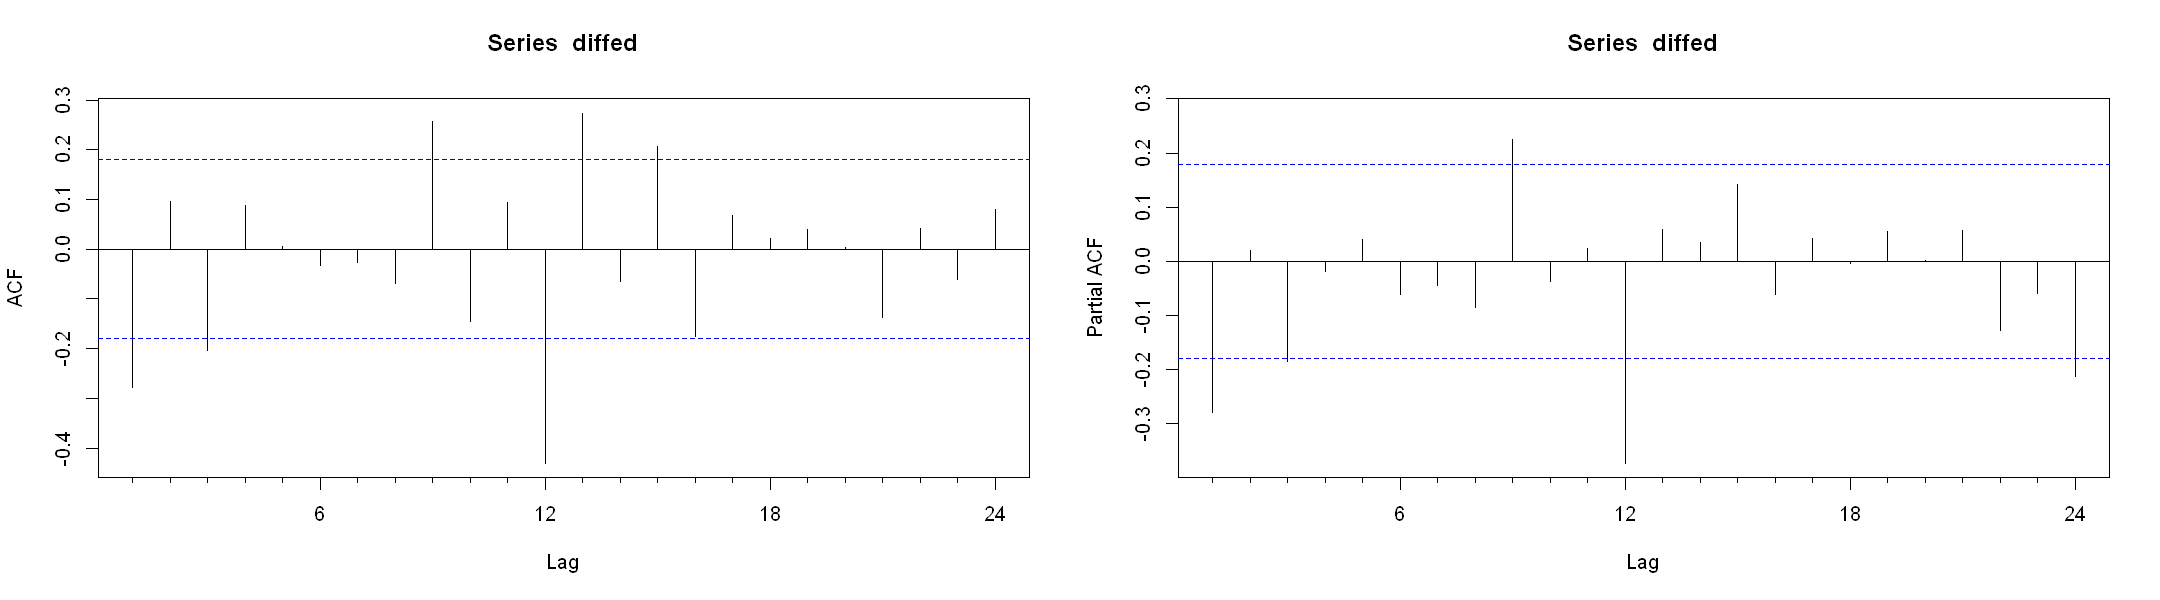

In [42]:
options(repr.plot.width=18, repr.plot.height=5)
par(mfrow = c(1, 2))
diffed <- diff(diff(train, 12))
Acf(diffed)
Pacf(diffed)

This model is appropriate because it captures both the trend and seasonality present in the data. Both were addressed through seasonal differencing (D=1), then through first-order differencing (d=1). Looking at the ACF, we can see a signfiicant spike at lag 12, suggesting a seasonal moving average term is appropriate. There is also a spike at lag 1, supporting a non-seasonal moving average component. 

## Model plot (0.75 marks)

Create a time plot of the data in black with a gap between the training set and test set data.

Show the fitted values of the model graphed in blue. Show the forecasts for the test set with a bold blue line and the 80% and 95% prediction intervals as shaded regions.

Prepare this plot for publication and upload it.

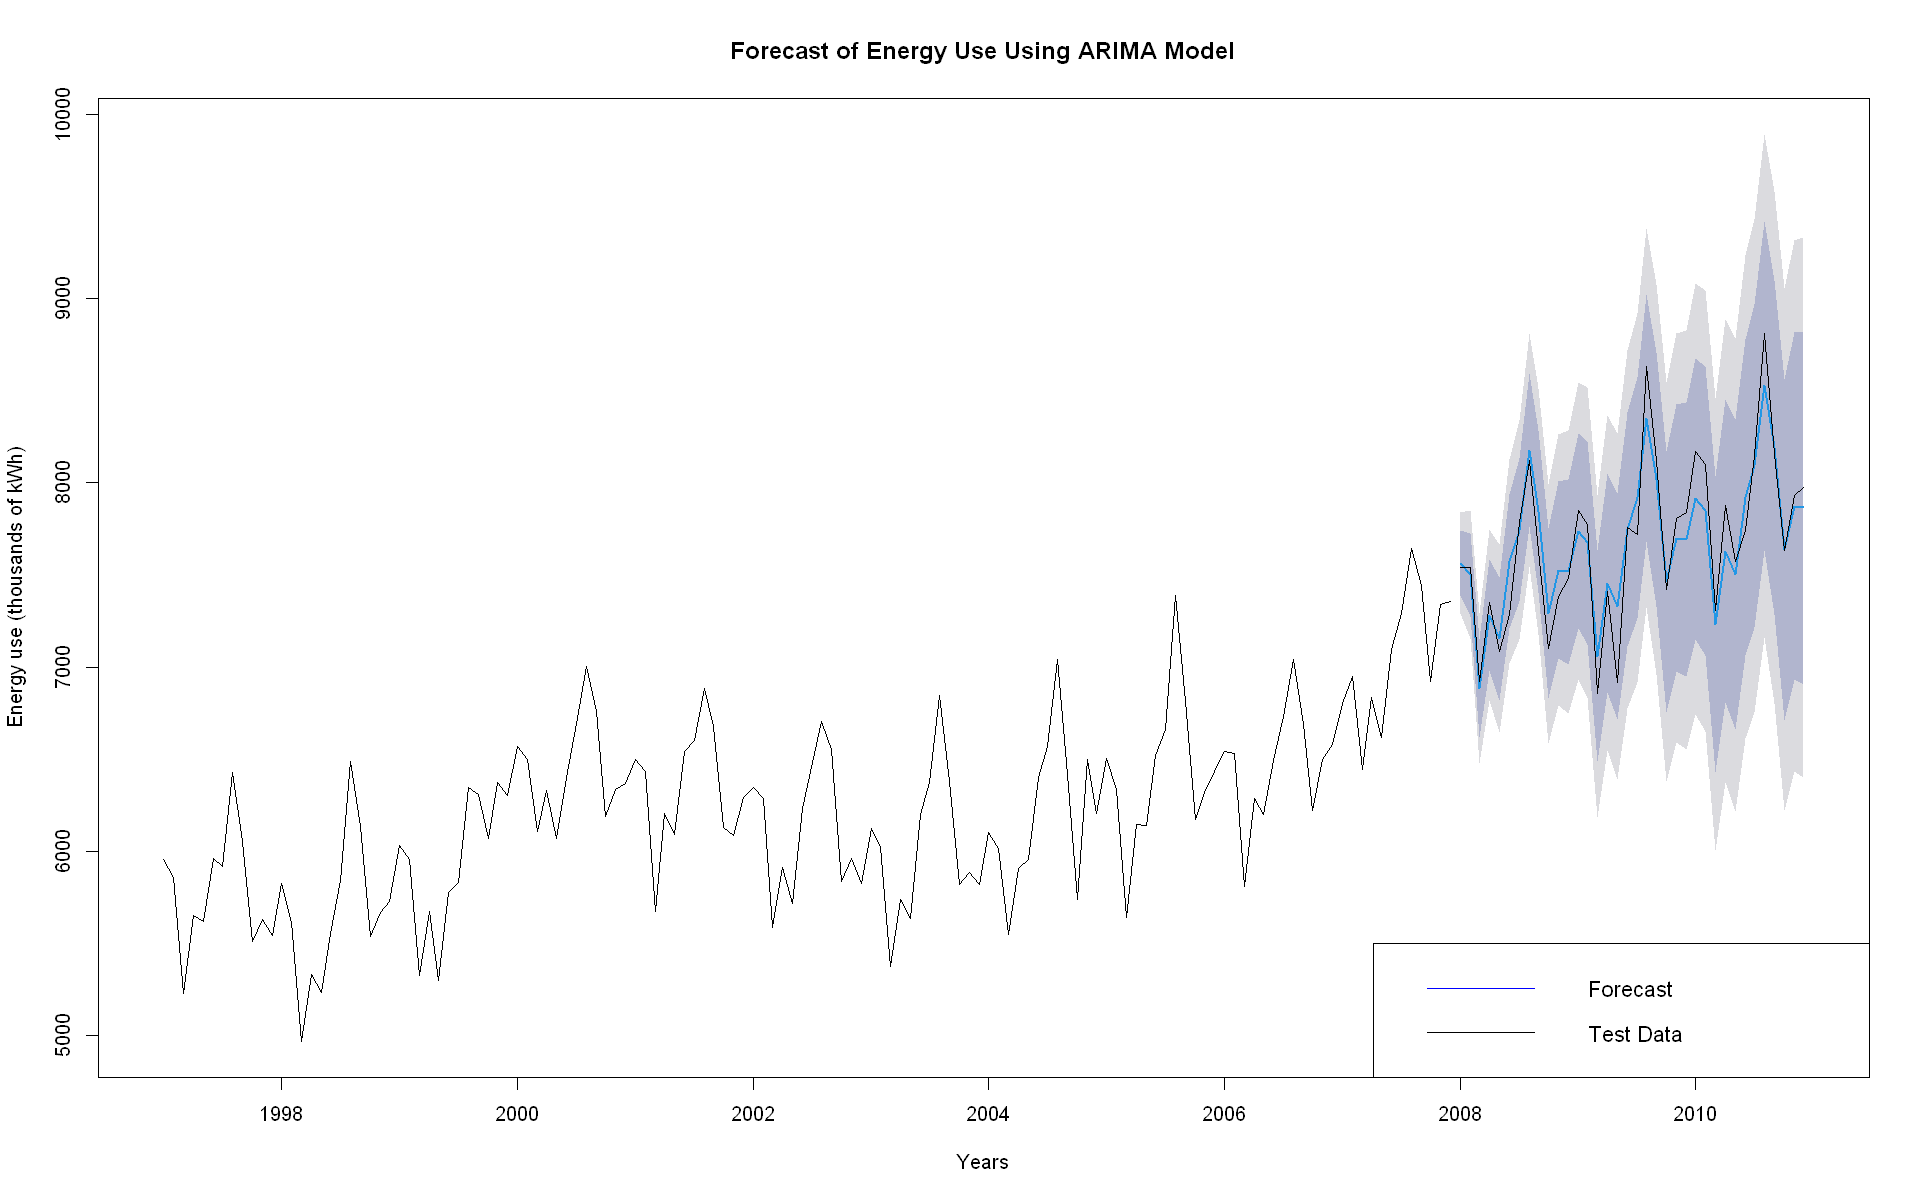

In [44]:
options(repr.plot.width=16, repr.plot.height=10)
plot(forecast(arimamodel, length(test)), xlab="Years", main = "Forecast of Energy Use Using ARIMA Model", 
     ylab = "Energy use (thousands of kWh)", lw = 1.5)
lines(test)
legend("bottomright", legend=c("Forecast", "Test Data"), col=c("blue", "black"), lty=1, cex=1.1)

## Goodness of fit (1 mark)

Quantify and discuss the goodness of fit of the model to the training set. You can compare this model to other ARIMA models that you tried. (Present any values, then 4 sentences max.)

In [46]:
fit1<- Arima(train, order=c(0,1,1), seasonal = c(0,1,1))
fit2<- Arima(train, order=c(0,1,2), seasonal = c(0,1,1))
fit3<- Arima(train, order=c(0,1,1), seasonal = c(0,1,2))
fit4<- Arima(train, order=c(1,1,0), seasonal = c(1,1,0))
fit5<- Arima(train, order=c(1,1,0), seasonal = c(1,1,1))
fit6<- Arima(train, order=c(1,1,1), seasonal = c(1,1,1))

method <- c("1. ARIMA(0,1,1)(0,1,1)[12]", "2. ARIMA(0,1,2)(0,1,1)[12]", "3. ARIMA(0,1,1)(0,1,2)[12]",
            "5. ARIMA(1,1,0)(1,1,1)[12]")
AICc <- c(fit1$aicc, fit2$aicc, fit3$aicc, fit5$aicc)
training_errors <- cbind(method, round(rbind(accuracy(forecast(fit1, length(test)), test)[1,c(2,3,5,6)], 
accuracy(forecast(fit2, length(test)), test)[1,c(2,3,5,6)],
accuracy(forecast(fit3, length(test)), test)[1,c(2,3,5,6)], 
accuracy(forecast(fit5, length(test)), test)[1,c(2,3,5,6)]
), 2), AICc)

training_errors

method,RMSE,MAE,MAPE,MASE,AICc
"1. ARIMA(0,1,1)(0,1,1)[12]",128.78,94.26,1.5,0.36,1531.20562697534
"2. ARIMA(0,1,2)(0,1,1)[12]",128.82,94.25,1.5,0.36,1533.34629653832
"3. ARIMA(0,1,1)(0,1,2)[12]",123.71,90.64,1.44,0.34,1531.12452994373
"5. ARIMA(1,1,0)(1,1,1)[12]",124.04,90.2,1.44,0.34,1530.94190726409


The model we chose ARIMA(0,1,1)(0,1,1)[12] is model 1 on this table. All the models were relatively similar in RMSE, MAE, MAPE, and MASE. The lowest being models 3 and 5, but the difference of 129 and 124 is quite insignificant given the context of the dataset (each data point being in the thousands). Similar can be said about MAE, MAPE and MASE. All the models seem to have relatively low errors and fit to the training set quite well. Although our chosen model does not have the best training errors, the different is small and the model was chosen based on better test set performance, suggesting better generalization. 

## Accuracy measures (0.5 marks)
Calculate the accuracy measures (RMSE, MAE, MAPE, MASE) to show how well the model forecasts for the test set.

In [98]:
round(accuracy(forecast(arimamodel, length(test)), test)[2, c(2,3,5,6)], 2)

RMSE    MAE   MAPE   MASE 
161.63 128.23   1.67   0.48

## Accuracy of forecasts (1 mark)
Discuss how well this model forecasts the test set based on any plots or values that you calculated in previous questions. Remember that you can compare it to the basic methods. (4 sentences max.)

Looking at the plot of the forecast and test again, we can see that the forecast fits the test set quite well. Overall, the error metrics also produced promising results. RMSE and MAE of 161 and 128 respsectively, are relatively low considering the scale of the data. MAPE of 1.67% also further supports the models high predictive accuracy. The MASE of 0.48 is below 1, meaning it performs better than the naive model. If we refer back to the error metrics of the basic methods, the ARIMA model significantly outpeforms even the "best" basic model, which was the drift model who had the lowest errors.


## Residual diagnostics (3.5 marks)

a) Calculate the mean of the residuals. Does this value indicate bias? (0.5 marks)  
b) Use the checkresiduals() function. Which properties of residuals have been met or not met according to these plots? (2 marks)  
c) Interpret the results of a portmanteau test for autocorrelations. Clearly state the hypotheses, the number of lags tested, the test statistic, p-value, decision, and concluding sentence. (1 mark)  

In [48]:
paste("Mean of Residuals=", round(mean(residuals(arimamodel)),4))

[1] "Mean of Residuals= 9.8519"

a) Yes. This indicates there is a small bias in our model, meaning our model tends to underpredict the actual values on average. 


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,1,1)[12]
Q* = 17.582, df = 22, p-value = 0.7305

Model df: 2.   Total lags used: 24



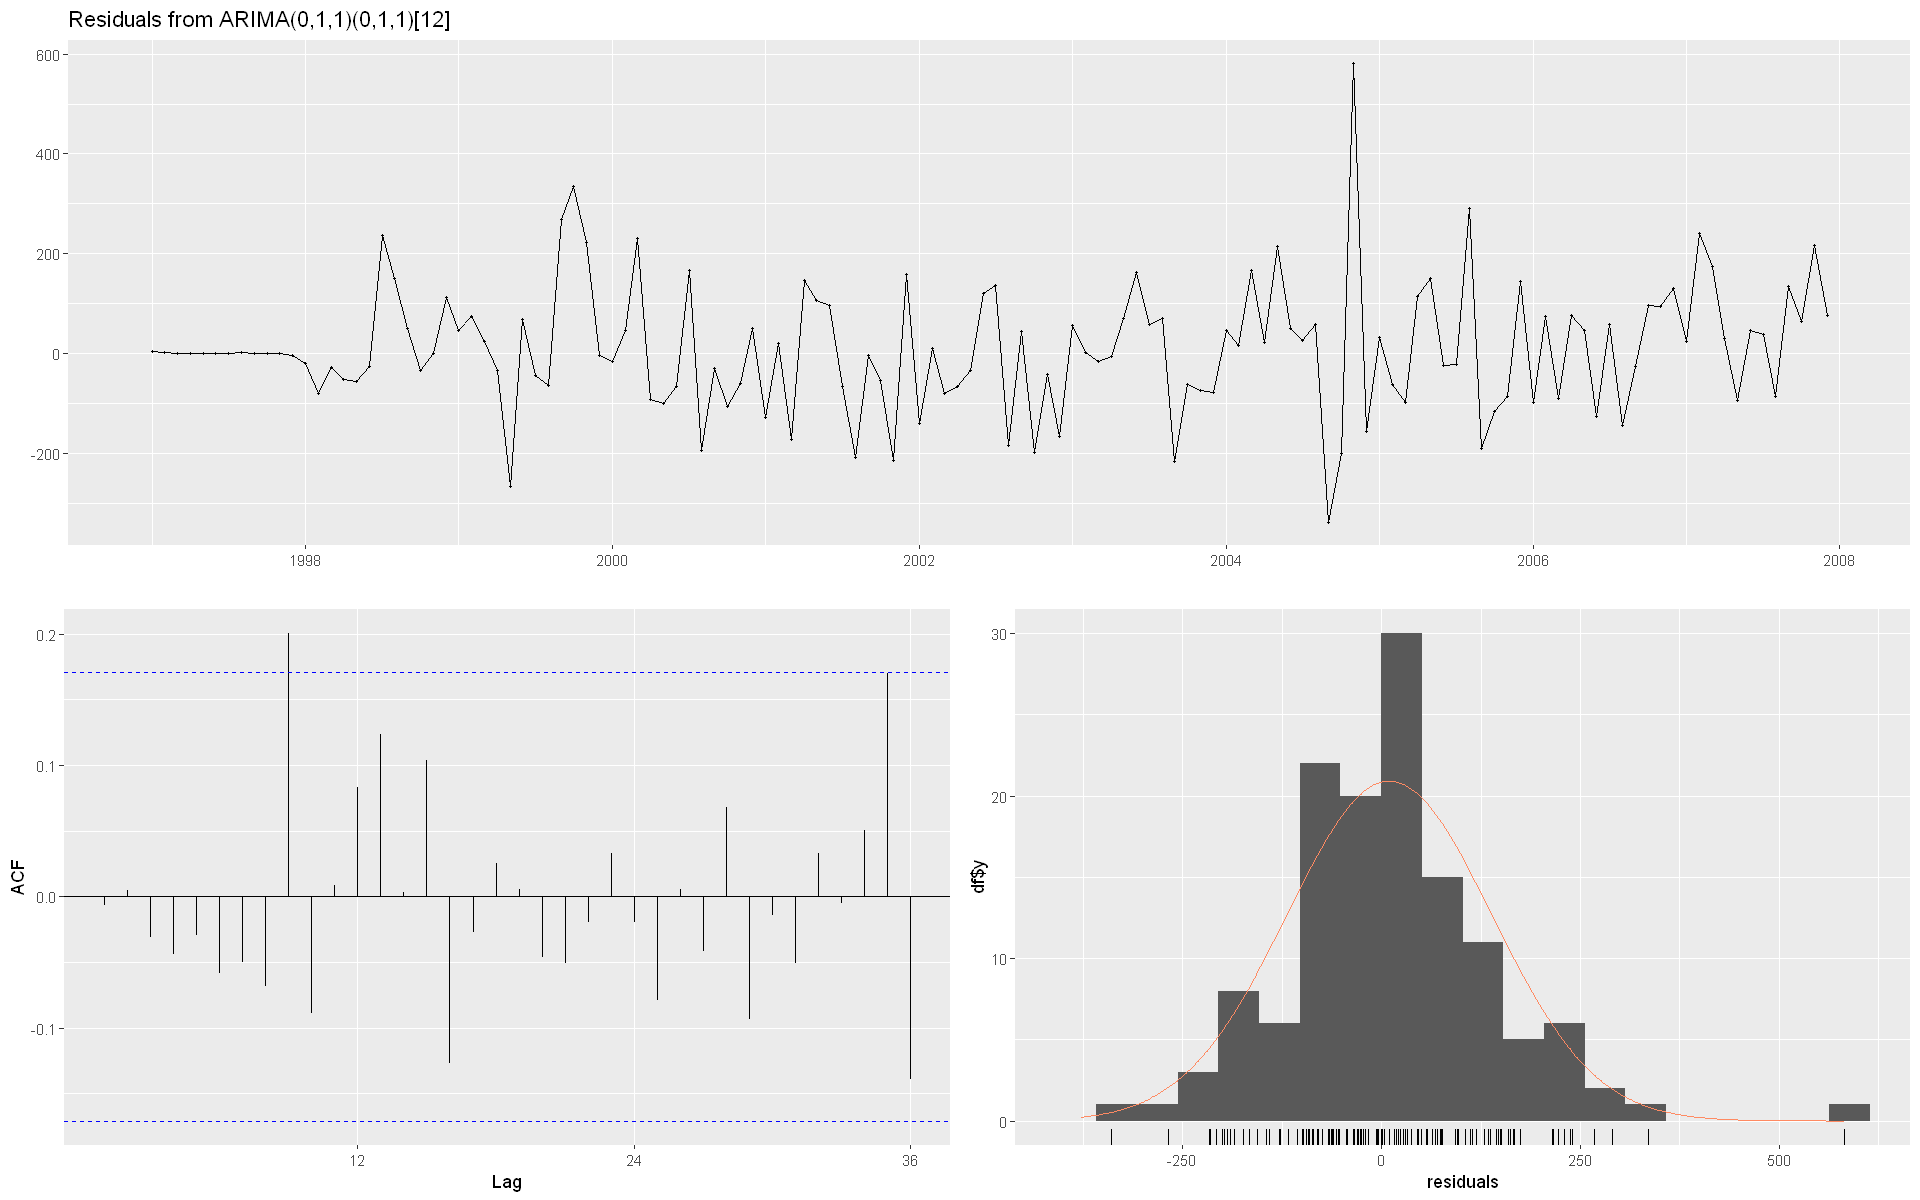

In [50]:
checkresiduals(arimamodel)

b) Our mean of residuals was 9.9, meaning it doesn't exactly meet the 0 mean requirement. But given the context that the datapoints are in thousands, it is a very small bias. On the ACF, we can see there is a significant spike at lag 9, indicating there is autocorrelation there. Variance seems mostly constant throughout the data, only exception is around 2005. The distribution of the residuals looks generally normally distributed as well, with a spike of residuals near the center of the distribution (reason why our mean is above 0). 

In [52]:
Box.test(residuals(arimamodel), type="Ljung", lag=12) # Box-Ljung test


	Box-Ljung test

data:  residuals(arimamodel)
X-squared = 9.9757, df = 12, p-value = 0.6181


c) Hypothesis: There is no autocorrelation up to lag 12 (because it is monthly data with yearly seasonality) <br>
Number of lags tested: 12 <br>
Test Statistic: 9.98<br>
p-Value: 0.6181 <br>

Since the p-value is greater than 0.05, we fail to reject the null hypothesis. This suggest that there is no significant autocorrelation in the residuals at the lags tested. 

----

<div class="alert alert-block alert-warning">
<a id="Comparison"></a>

# Comparison of models (200 words max.) (2 marks)  

Compare your exponential smoothing/ETS model, your ARIMA model, and the basic methods. Which one is your best forecasting method (this will be your final model that is used in the next two sections)? Explain using support from previous questions as well as by creating a plot to compare the forecasts for the test set for the different methods.  
<div>


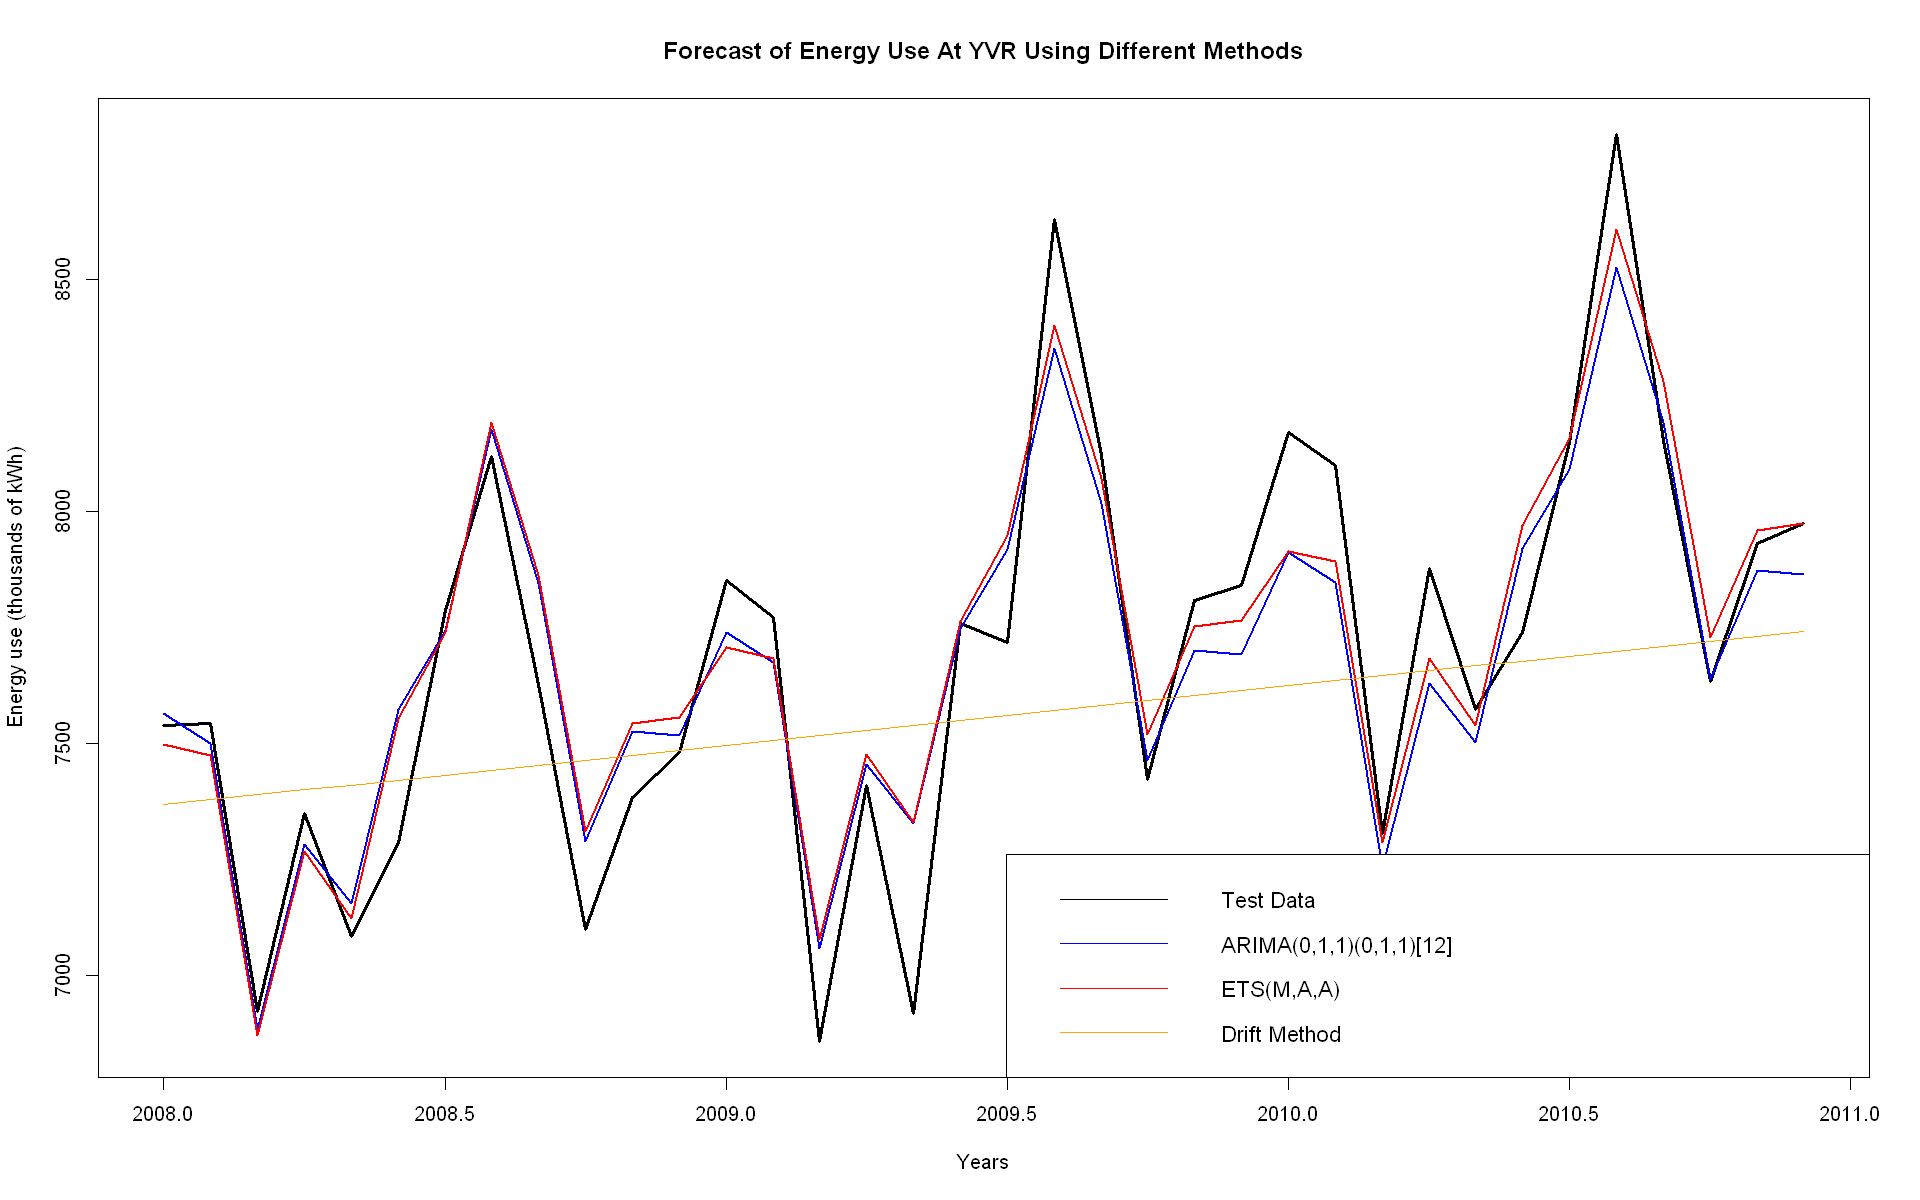

In [57]:
options(repr.plot.width=16, repr.plot.height=10)

plot(test, xlab="Years", main = "Forecast of Energy Use At YVR Using Different Methods", 
     ylab = "Energy use (thousands of kWh)", lwd = 3, col = "black")

#ARIMA
lines(forecast(arimamodel, h = length(test))$mean, col = "blue", lwd = 2)

#ETS
lines(forecast(etsmodel, h = length(test))$mean, col = "red", lwd = 2)

# Naive
lines(forecast(drift_fc, h = length(test))$mean, col = "orange", lwd = 1.5)

legend("bottomright", 
       legend=c("Test Data", "ARIMA(0,1,1)(0,1,1)[12]", "ETS(M,A,A)", "Drift Method"), 
       col=c("black", "blue", "red", "orange"), 
       lty=1, cex=1.1)


## Forecast Comparison Overview 
The basic forecasting methods performed poorly compared to the ETS and ARIMA models, these simpler methods couldn't capture the complex patterns in the data.
 
### Test Set Accuracy Comparison
The ETS(M,A,A) and ARIMA(0,1,1)(0,1,1)[12] both captured seasonal trends well, but ETS outperformed ARIMA on the test set. ETS had lower RMSE (155.98 vs. 161.63), MAE (123.18 vs. 128.23), and MAPE (1.61% vs. 1.67%). Residual diagnostics showed ETS produced unbiased residuals (mean close to zero, no significant autocorrelation, Ljung-Box p-value: 0.9741), while ARIMA had a slight bias (mean residual: 9.85) but passed the autocorrelation test (p-value: 0.7305).

### Residual Analysis 
Although ARIMA had a lower AICc (1531.21 vs. 1962.99), indicating a better fit to the training data, ETS offered more stable, interpretable forecasts. ETS decomposed the series into clear trend and seasonal components, while ARIMA was better for capturing sudden changes but didn't surpass ETS in accuracy.
### Final Recommendation 
ETS(M,A,A) was selected as the final model due to its superior test accuracy, unbiased residuals, and interpretability, while ARIMA remains a strong alternative for datasets with irregular patterns.

<div class="alert alert-block alert-info"> 
<a id="Forecasts"></a>   
    
# Forecasts (1.25 marks)

Calculate the point forecasts using your final model for the next three years (January 2011 through December 2013).

Plot the entire dataset with the forecasts from your best forecasting method, including prediction intervals.
</div>

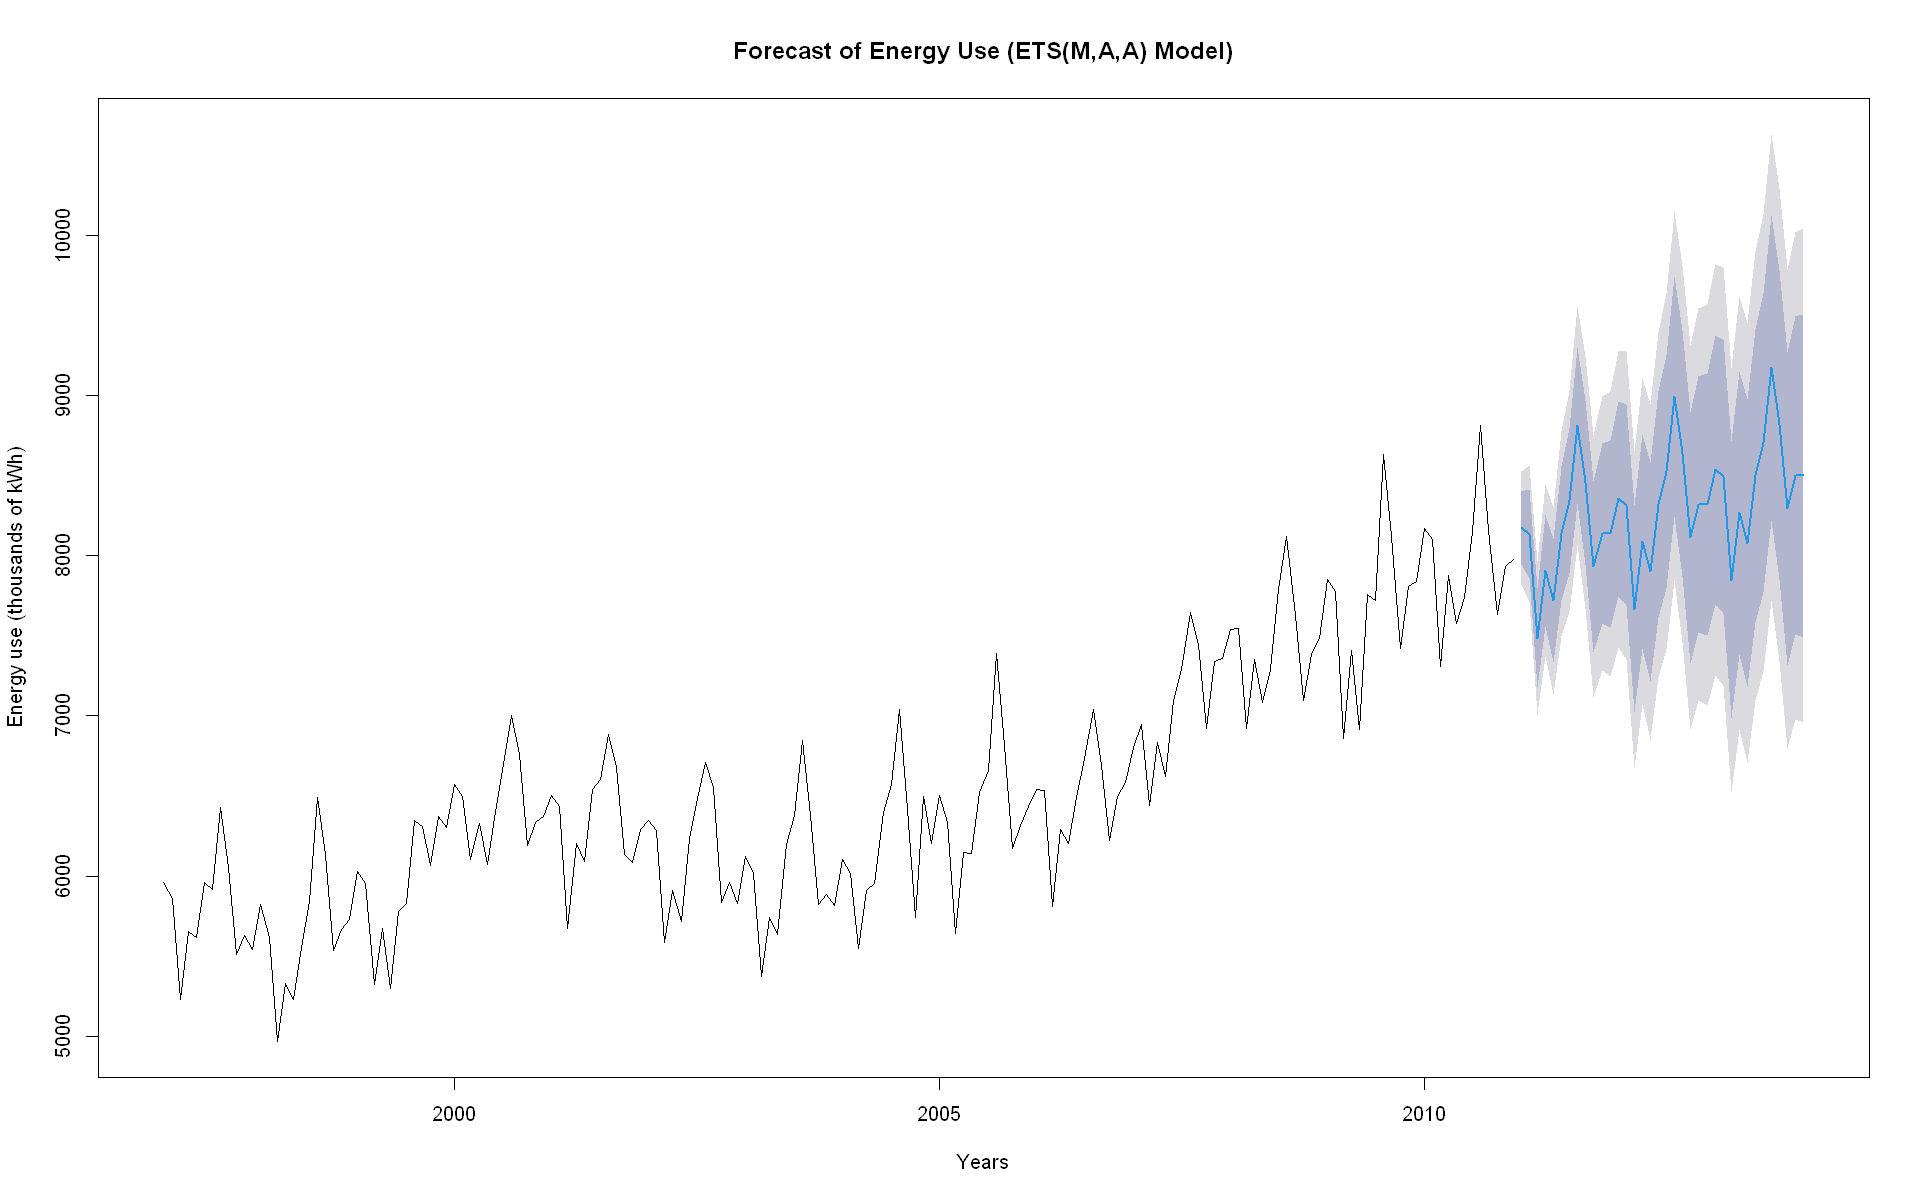

In [59]:
options(repr.plot.width=16, repr.plot.height=10)
finalmodel <- ets(elecuse_ts, model = "MAA")
plot(forecast(finalmodel, h=length(test)), xlab="Years", main = "Forecast of Energy Use (ETS(M,A,A) Model)", 
     ylab = "Energy use (thousands of kWh)", lw = 1.5)

<div class="alert alert-block alert-warning">
<a id="Discussion"></a>

# Discussion (300 words max.) (3 marks)

Discuss three limitations of this final model, and recommendations to address these limitations. (300 words max.)
<div>


### 1. Overfitting to Training Data:

Limitation: The ETS(M,A,A) model may overfit the training data, reducing its ability to generalize to future periods, especially if energy consumption patterns shift.

Recommendation: Use cross-validation or rolling-origin forecasts to evaluate model performance on unseen data. Additionally, introduce regularization techniques or compare with hybrid models (e.g., ETS-ARIMA).

### 2. Limited Adaptability to Sudden Changes:

Limitation: The model assumes consistent seasonal and trend patterns, which may lead to inaccurate forecasts during sudden events (e.g., policy changes or economic disruptions).

Recommendation: Implement an ensemble model approach, combining ETS with ARIMA or machine learning models to improve adaptability. Adding external regressors (e.g., temperature, passenger volume) could enhance responsiveness to potential sudden changes.

### 3. Residual Bias and Autocorrelation Risk:

Limitation: While residual analysis showed no significant autocorrelation, minor biases may still exist, potentially impacting long-term forecasts.

Recommendation: Perform residual diagnostics regularly and consider using ARIMA models on residuals for error correction. Additionally, evaluate different ETS configurations (e.g., damped trend variants) to reduce residual error.

----

<div class="alert alert-block alert-danger">
<a id="AppendixA"></a>

# Appendix A:
# ETS models (1 mark)
Include the ETS models that you tried and a brief description of why you ruled these out and selected your best ETS model to present above.
</div>

Using a decomposition plot, we can look into the 3 components of ETS: trend, seasonality, and residuals.  

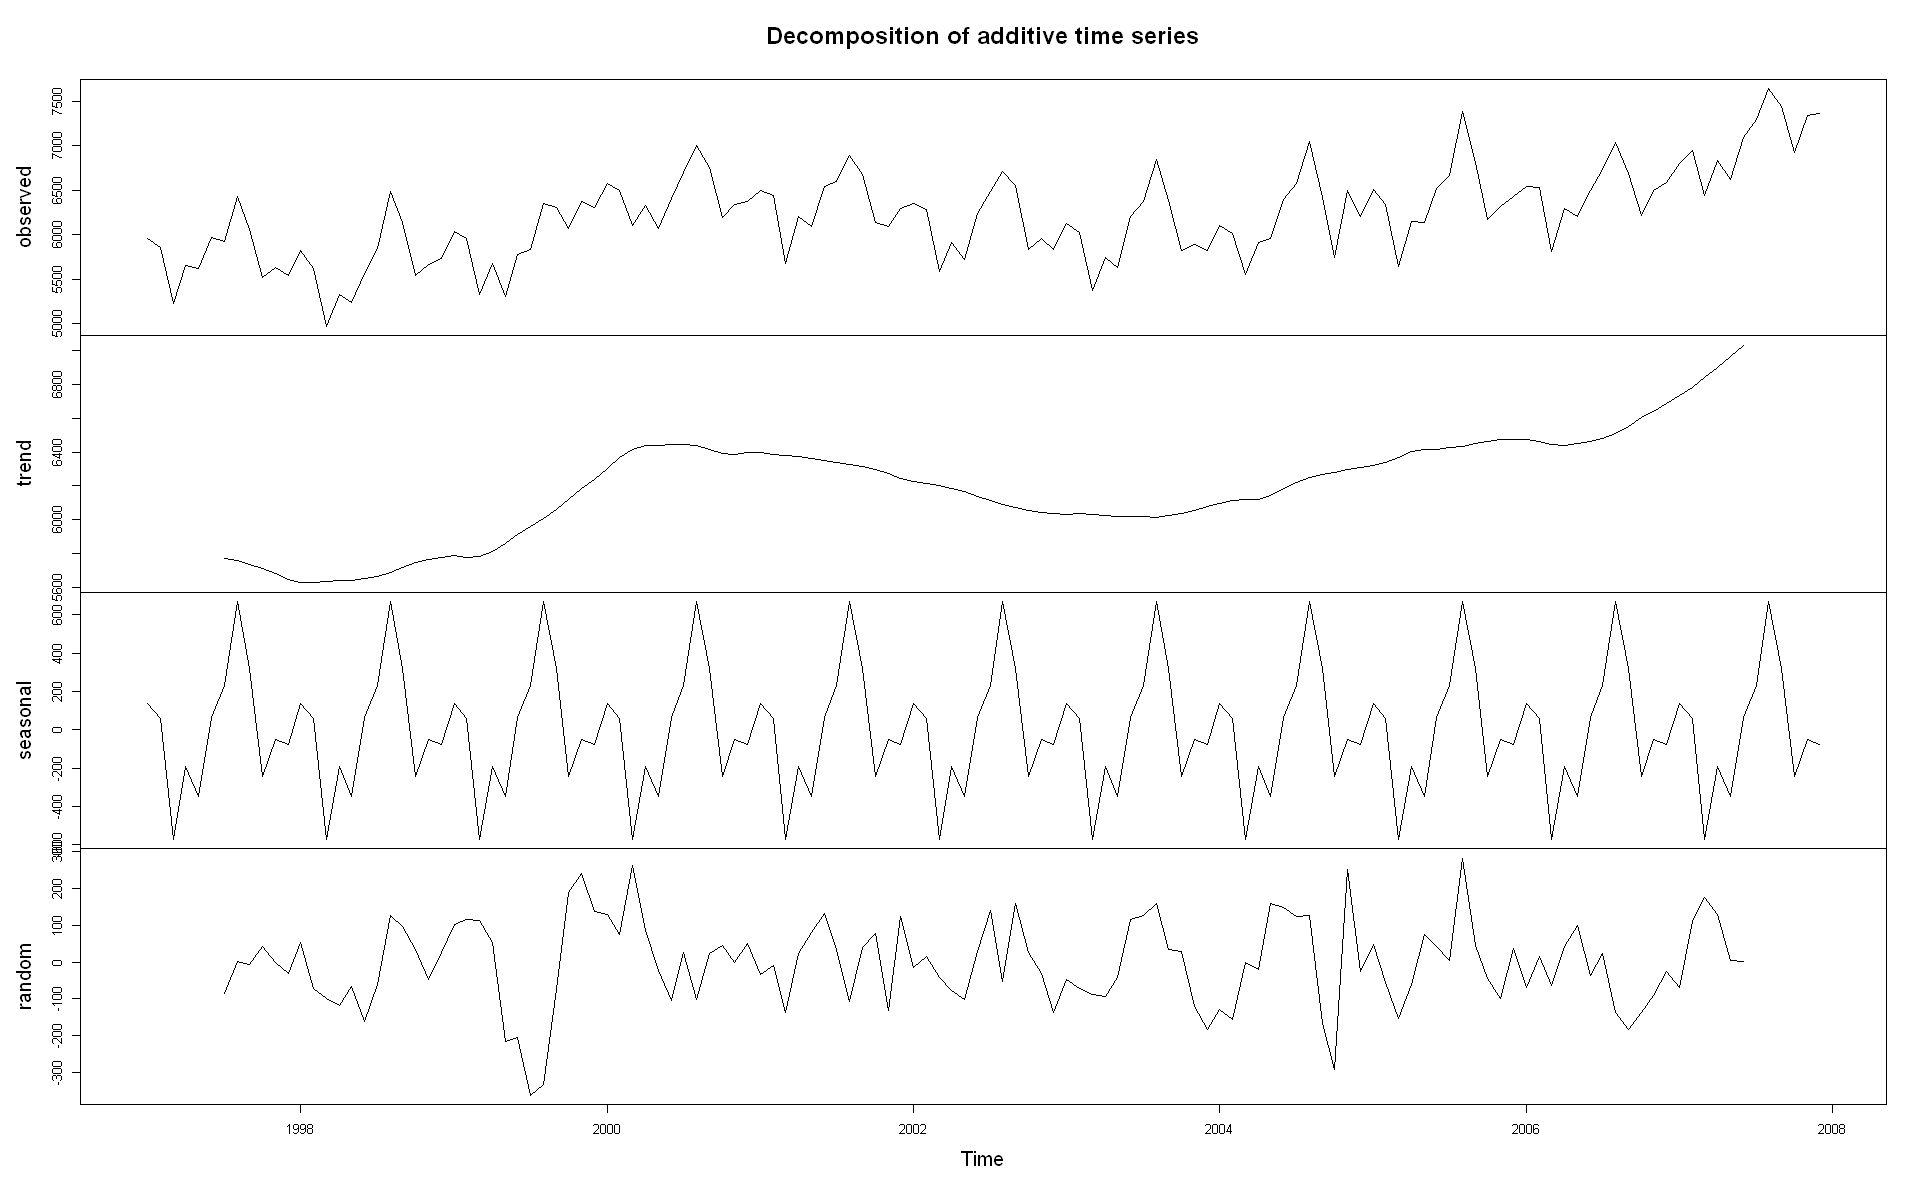

In [104]:
plot(decompose(train))

**Residuals**: Variance looks very random and fluctuates, it is possible for the residual component is either additive (A) or multiplicative (M). 

**Trend**: There is an obvious positive trend that looks lienar, trend component should be additive (A). 

**Seasonality**: There is constant seasonality throughout the entire training set, seasonal component should be additive (A).

Lets first test the model that R determines as the best model using ets().

In [105]:
etsauto <- ets(train)
etsauto

ETS(A,N,A) 

Call:
ets(y = train)

  Smoothing parameters:
    alpha = 0.8142 
    gamma = 1e-04 

  Initial states:
    l = 6028.2465 
    s = -53.9951 -35.1353 -238.2527 322.9962 671.4127 226.3734
           66.8415 -359.4489 -191.2235 -589.7391 56.3954 123.7755

  sigma:  133.9544

     AIC     AICc      BIC 
1952.670 1956.808 1995.912 

We can already see that this model may not be ideal because it says there is no trend as they have the trend component as N. Lets test out the two models using the observations from before, AAA and MAA. 

In [106]:
ets1 <- ets(train, model ="AAA")
ets2 <- ets(train, model ="MAA")

In [107]:
method <- c("1. Auto", "2. AAA", "3. MAA")
AICc <- c(etsauto$aicc, ets1$aicc, ets2$aicc)
etstable <- cbind(method, round(rbind(accuracy(forecast(etsauto, length(test)), test)[2,c(2,3,5,6)], 
accuracy(forecast(ets1, length(test)), test)[2,c(2,3,5,6)],
accuracy(forecast(ets2, length(test)), test)[2,c(2,3,5,6)]
), 2),AICc)

etstable

method,RMSE,MAE,MAPE,MASE,AICc
1. Auto,386.41,315.94,4.01,1.19,1956.80820704385
2. AAA,189,155.9,2,0.59,1961.22361586491
3. MAA,155.98,123.18,1.61,0.46,1962.99630097688


---

<div class="alert alert-block alert-danger">
<a id="AppendixB"></a>

# Appendix B:
# ARIMA Models (1 mark)
Include the ARIMA models that you tried and a brief description of why you ruled these out and selected your best ARIMA model to present above.
</div>

## Fit Using Auto Arima

Series: train 
ARIMA(1,1,0)(2,1,0)[12] 

Coefficients:
          ar1     sar1     sar2
      -0.2482  -0.4993  -0.2136
s.e.   0.0909   0.0937   0.1006

sigma^2 = 24330:  log likelihood = -769.95
AIC=1547.9   AICc=1548.25   BIC=1559.01

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE
Training set 9.902709 146.2229 104.9458 0.1326502 1.668495 0.3960468
                     ACF1
Training set -0.008078189

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,9.902709,146.2229,104.9458,0.1326502,1.668495,0.3960468,-0.008078189,NA
Test set,-334.695112,394.1730,334.6951,-4.4865974,4.486597,1.2630799,0.415204200,0.8146622


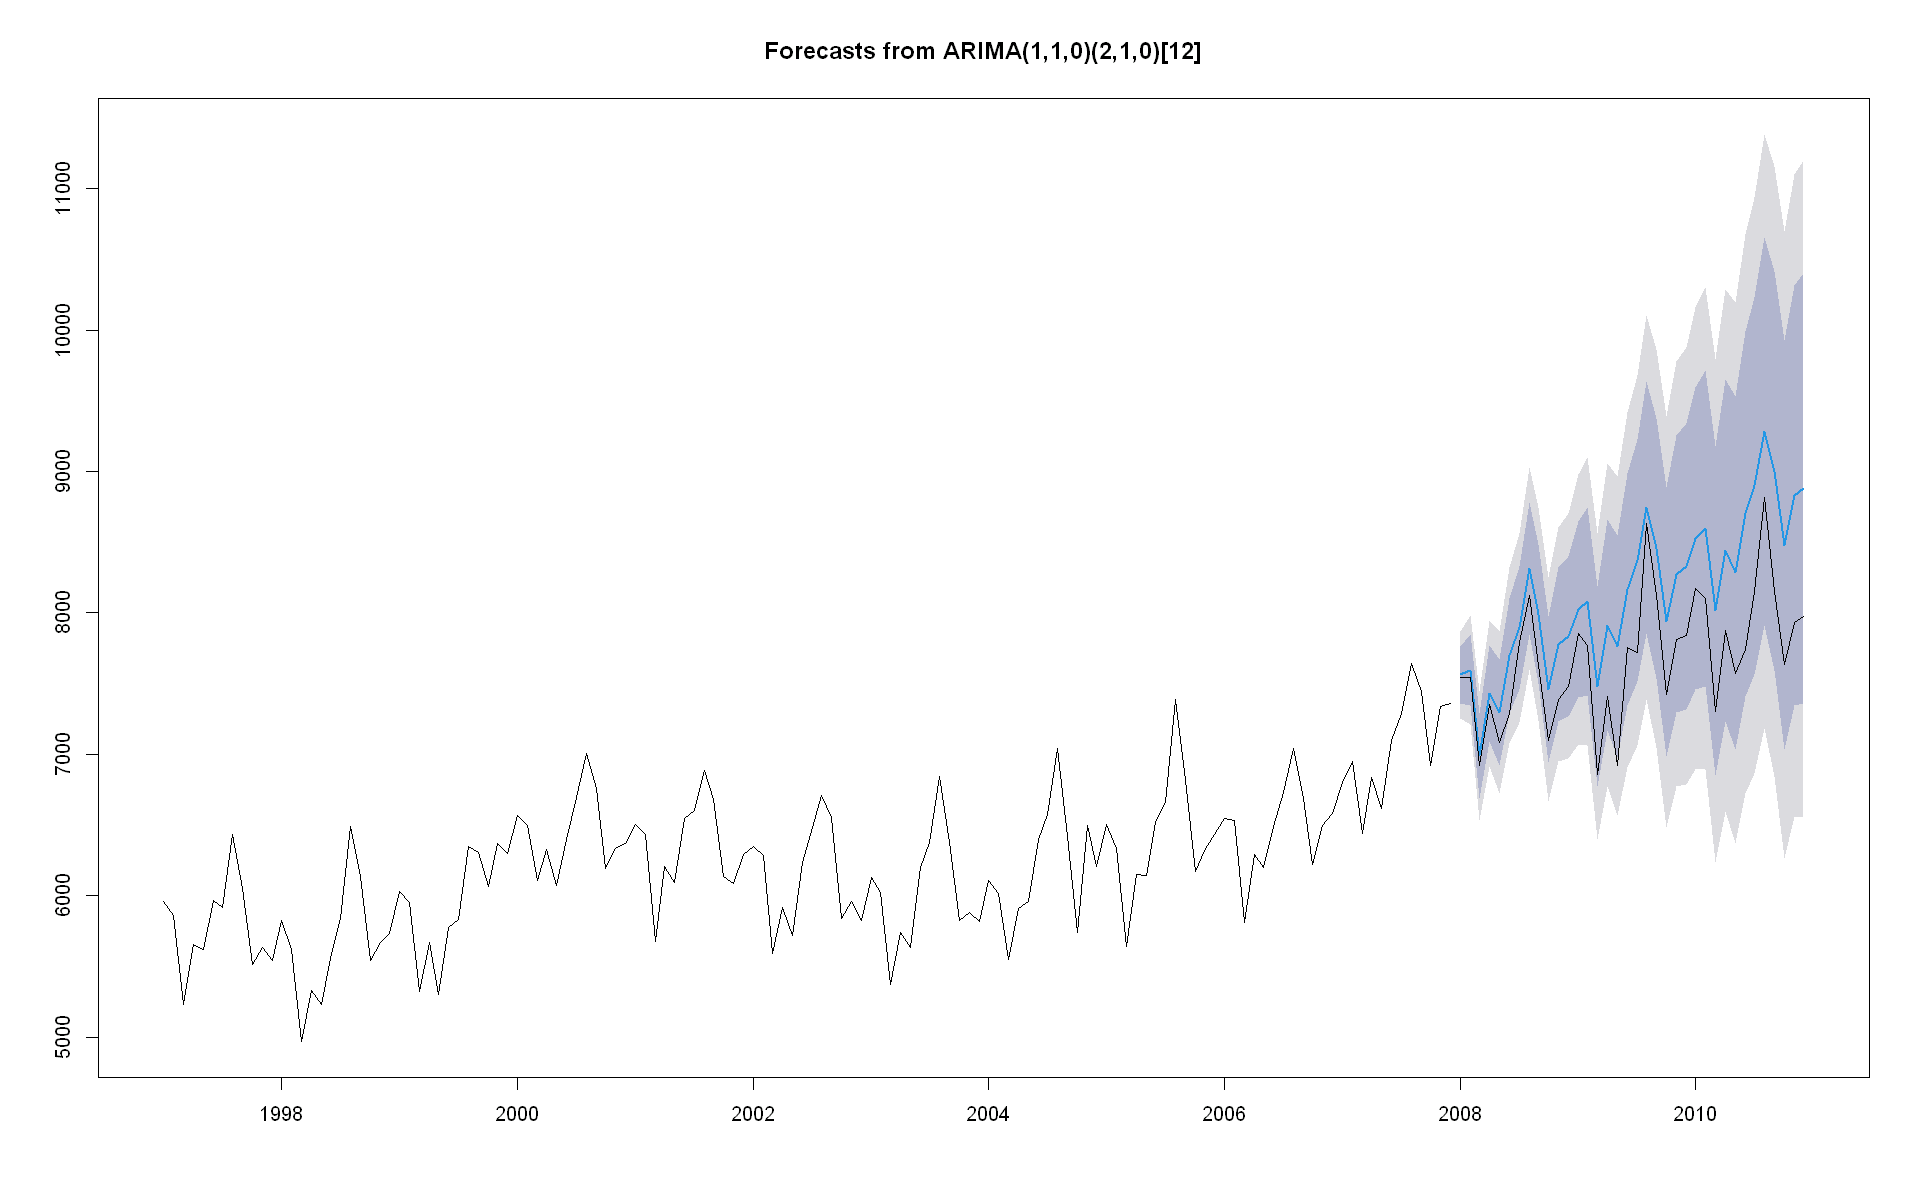

In [108]:
auto <- auto.arima(train)
summary(auto)
plot(forecast(auto, h=36))
lines(test)
accuracy(forecast(auto), test)

## Choosing our own model

First we looked at the data and see if it is stationary. 

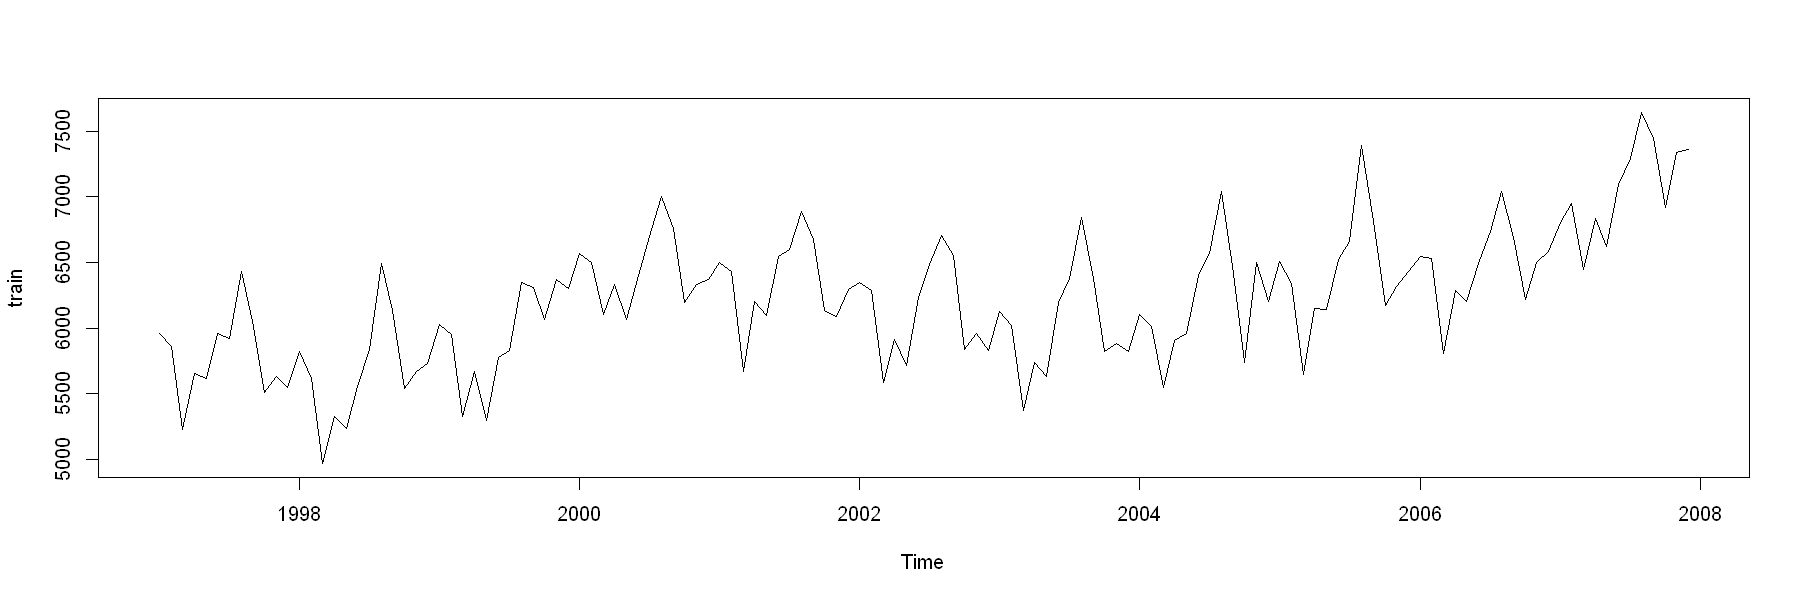

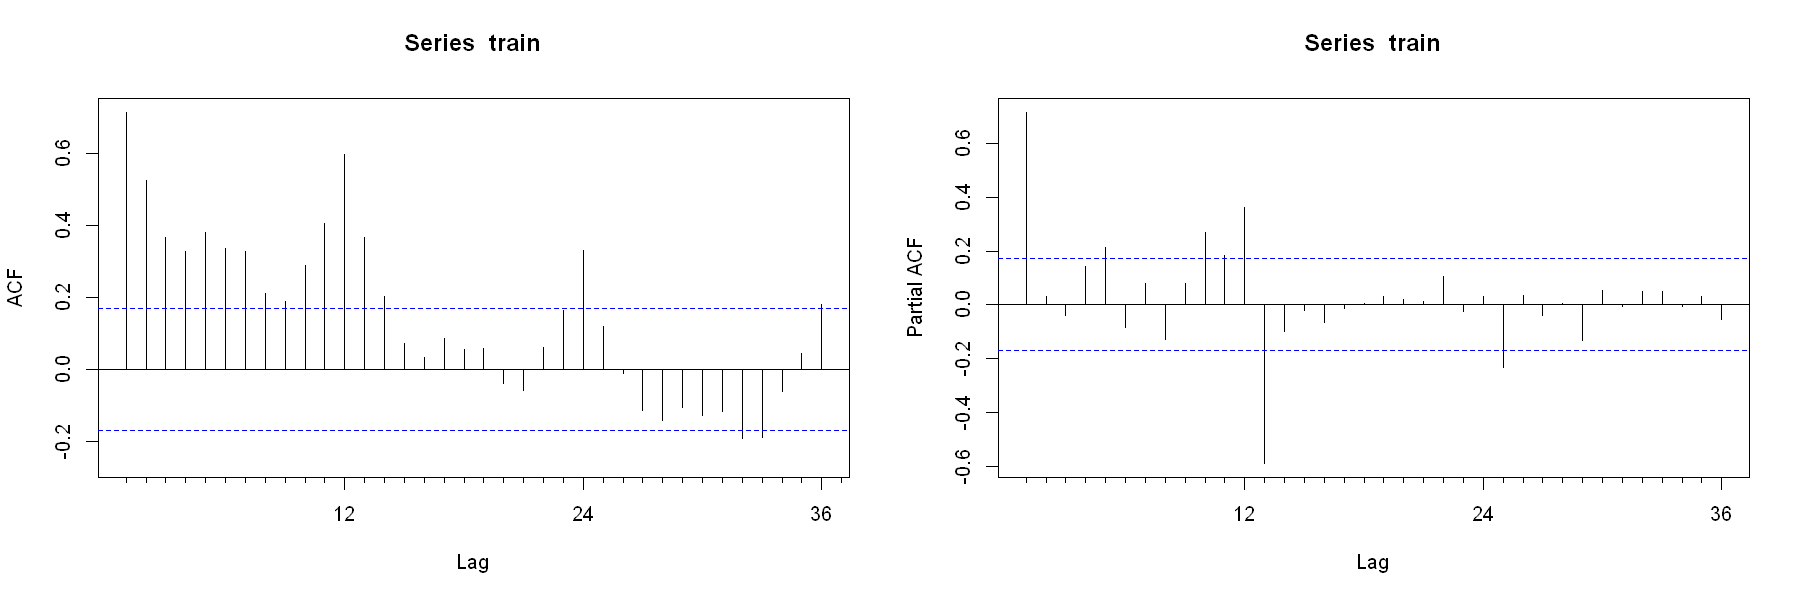

In [109]:
options(repr.plot.width=15, repr.plot.height=5)
plot(train)
par(mfrow = c(1, 2))
Acf(train, lag =36)
Pacf(train, lag =36)

Looking at ACF and PACF, there is a clear seasonal component. On the ACF, there are lags at 12, 24, 36, meaning we need to use seasonal differencing. 

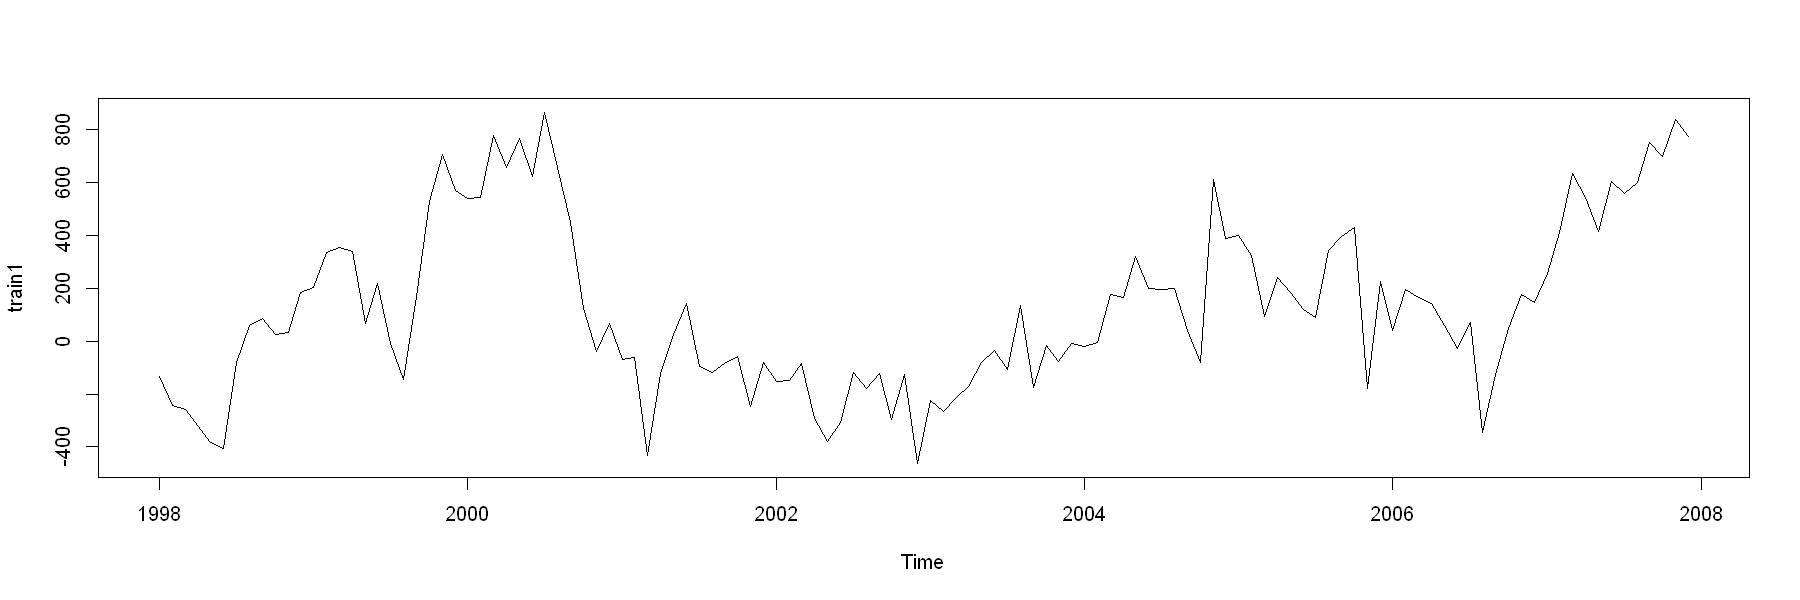

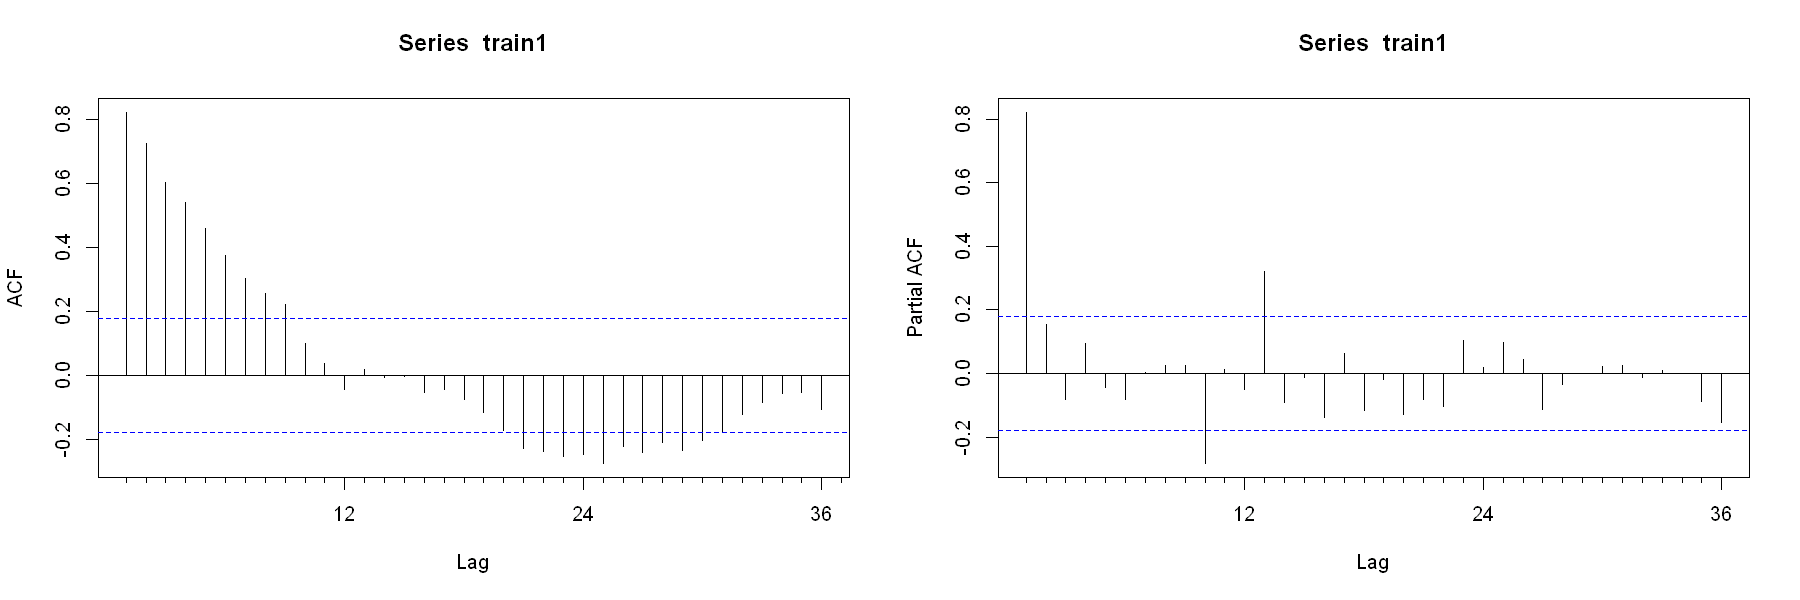

In [110]:
train1 <- diff(train, 12) #seasonal differencing
plot(train1)
options(repr.plot.width=15, repr.plot.height=5)
par(mfrow = c(1, 2))
Acf(train1, lag =36)
Pacf(train1, lag =36)

In the ACF, there are many significant lags trending downwards, indicating trend. This means data is non-stationary, so we need to take an additional frist difference. 

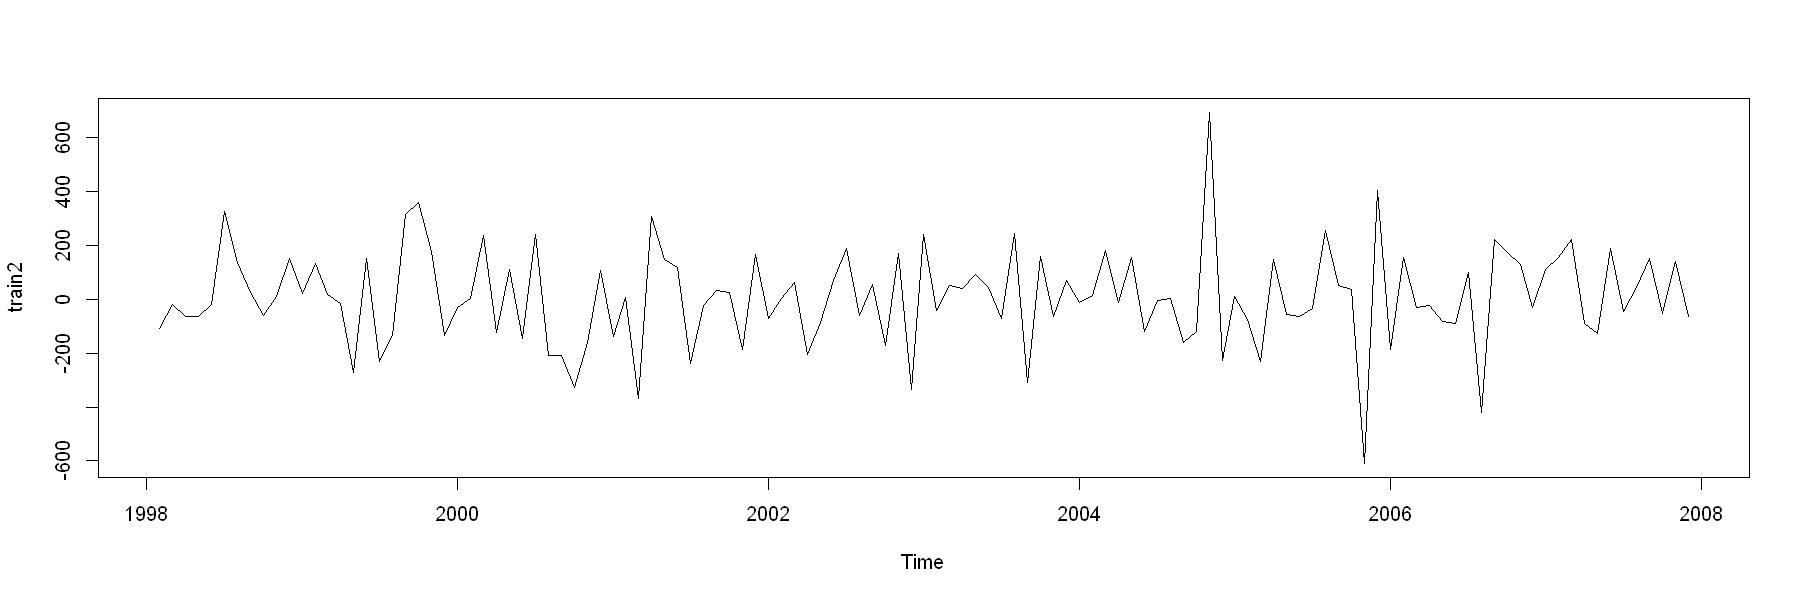

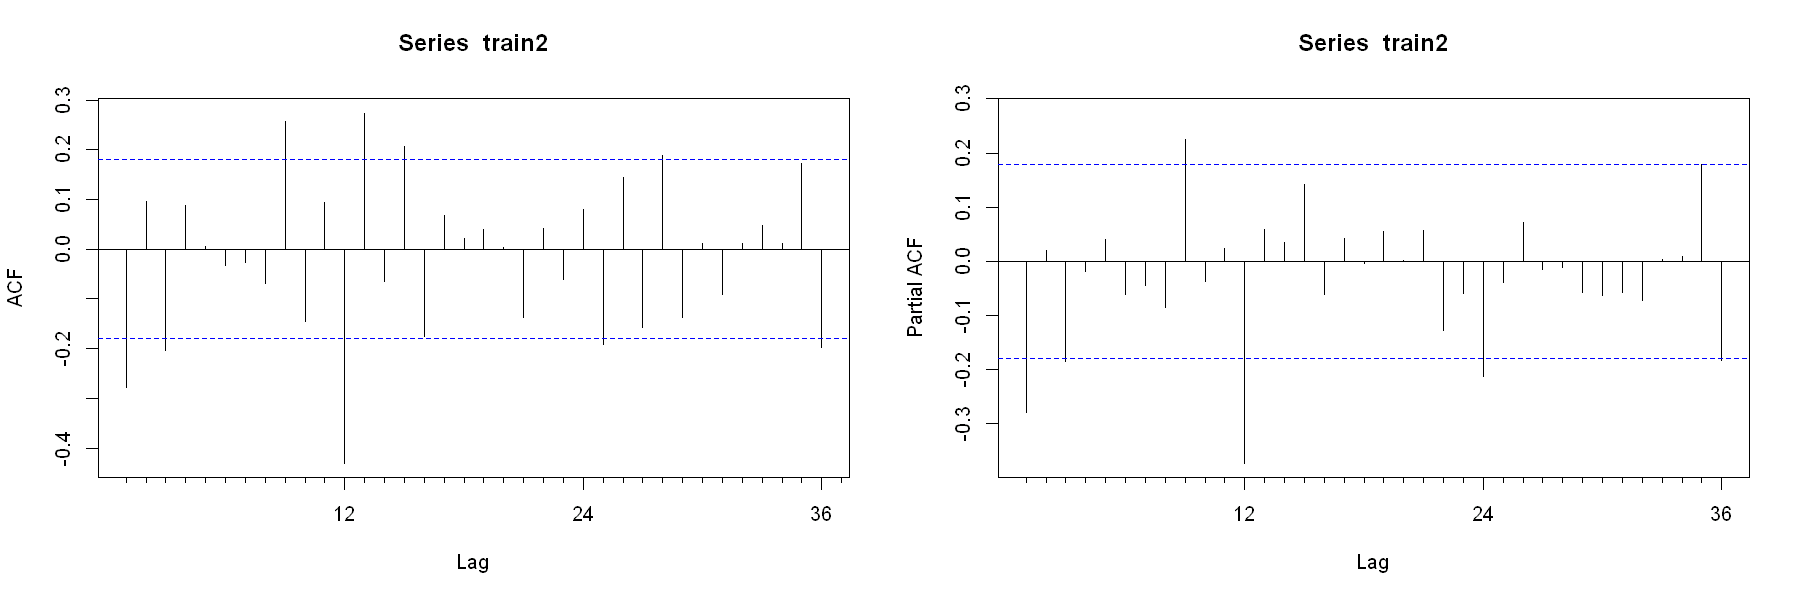

In [111]:
train2 <- diff(diff(train, 12))
plot(train2)
options(repr.plot.width=15, repr.plot.height=5)
par(mfrow = c(1, 2))
Acf(train2, lag =36)
Pacf(train2, lag =36)

Model: **ARIMA(p,d,q)(P,D,Q)m** <br> 
There was seasonality and non-stationarity, so first we begin with a ARIMA(0,1,0)(0,1,0)[12] model.

**ACF** shows lag spike at lag 1, suggets a non-seasonal MA(1) component. The significant spike at lag 12 suggets a seasonal MA(1) component. <br>
This would leads us to a **ARIMA(0,1,1)(0,1,1)[12]** model.

The **PACF** looks simpler with less significant spikes. PACF also showed similar significant spikes as ACF, which means we should start with a **ARIMA(1,1,0)(1,1,0)[12]** model. <br>

Although PACF is looks simpler, lets take a look at both, starting with moving average components ARIMA(0,1,1)(0,1,1)[12] based on the ACF.  

[1] "AICc: 1531.20562697534"

	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,1,1)[12]
Q* = 17.582, df = 22, p-value = 0.7305

Model df: 2.   Total lags used: 24



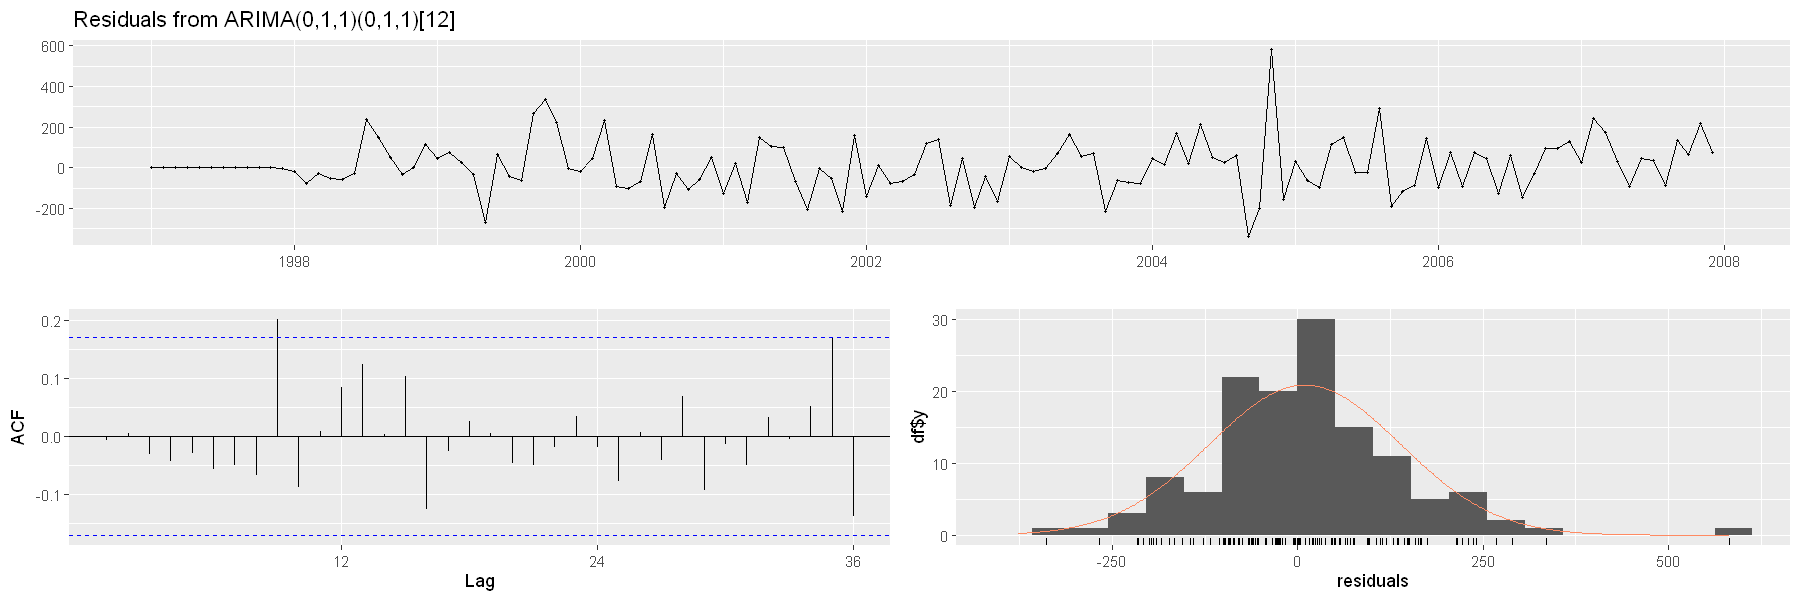

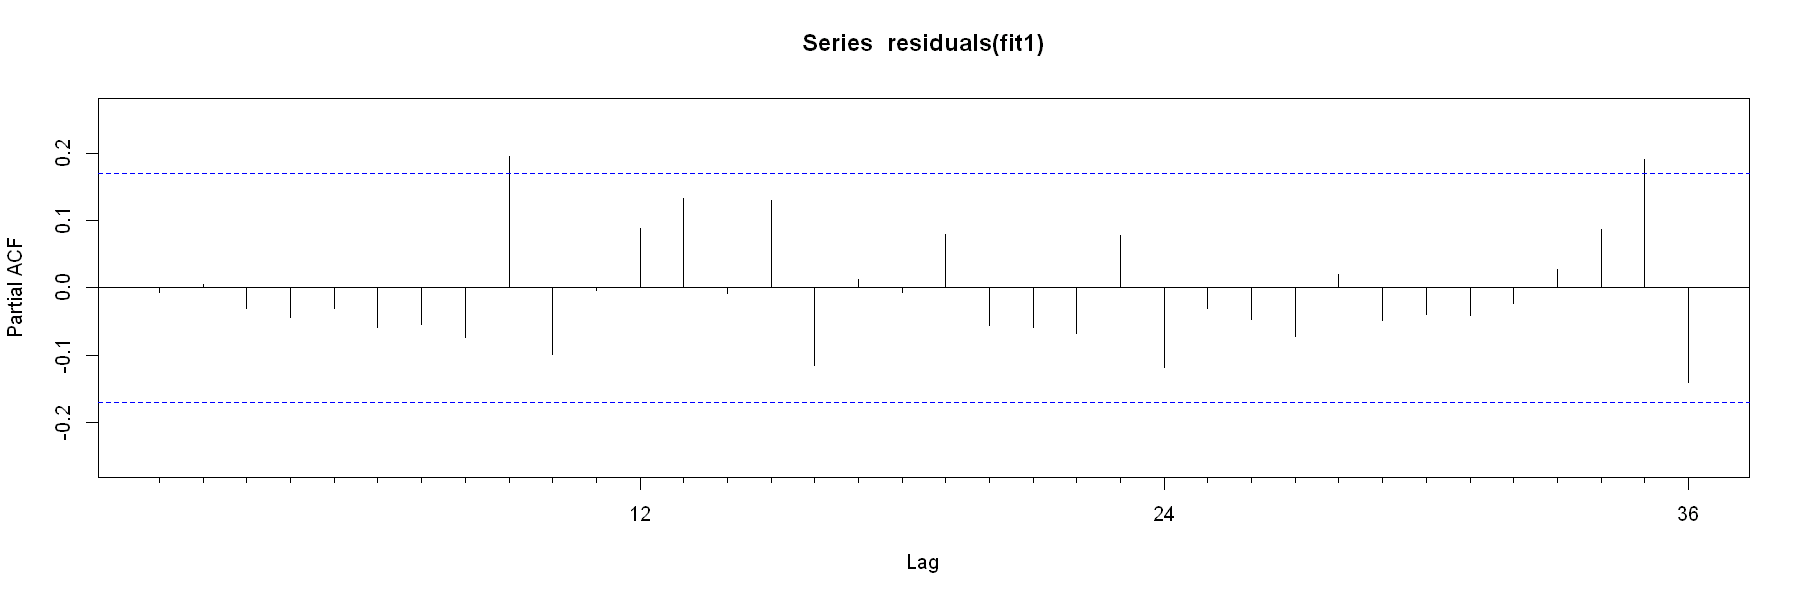

In [112]:
fit1<- Arima(train, order=c(0,1,1), seasonal = c(0,1,1))
print(paste('AICc:', fit1$aicc))
checkresiduals(fit1)
Pacf(residuals(fit1), 36)

In the AFC for the residuals, we can still see significant lag spikes at 9 and 35. This suggets we might need additional non-seasonal terms in the model. <br> Lets try **ARIMA(0,1,2)(0,1,1)[12]**. 

[1] "AICc: 1533.34629653832"

	Ljung-Box test

data:  Residuals from ARIMA(0,1,2)(0,1,1)[12]
Q* = 17.569, df = 21, p-value = 0.6761

Model df: 3.   Total lags used: 24



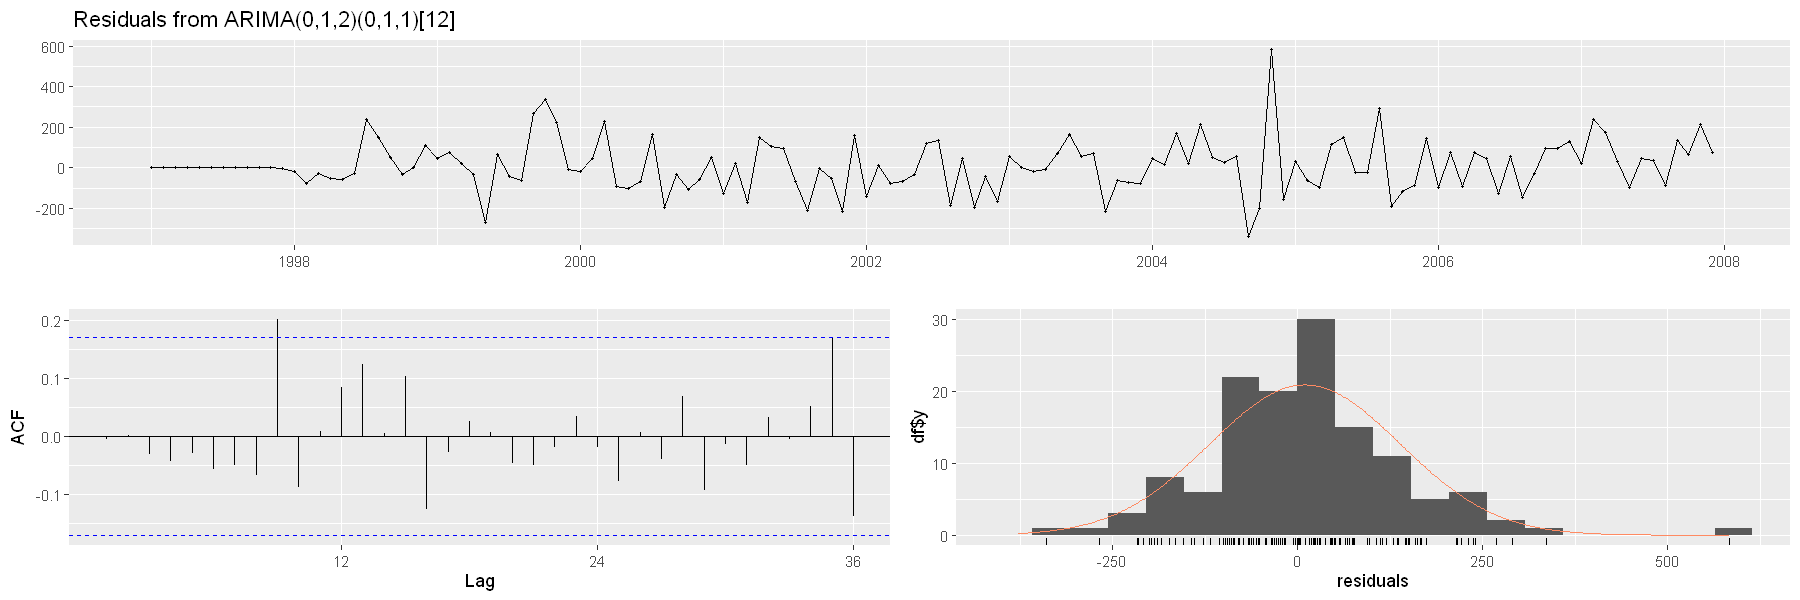

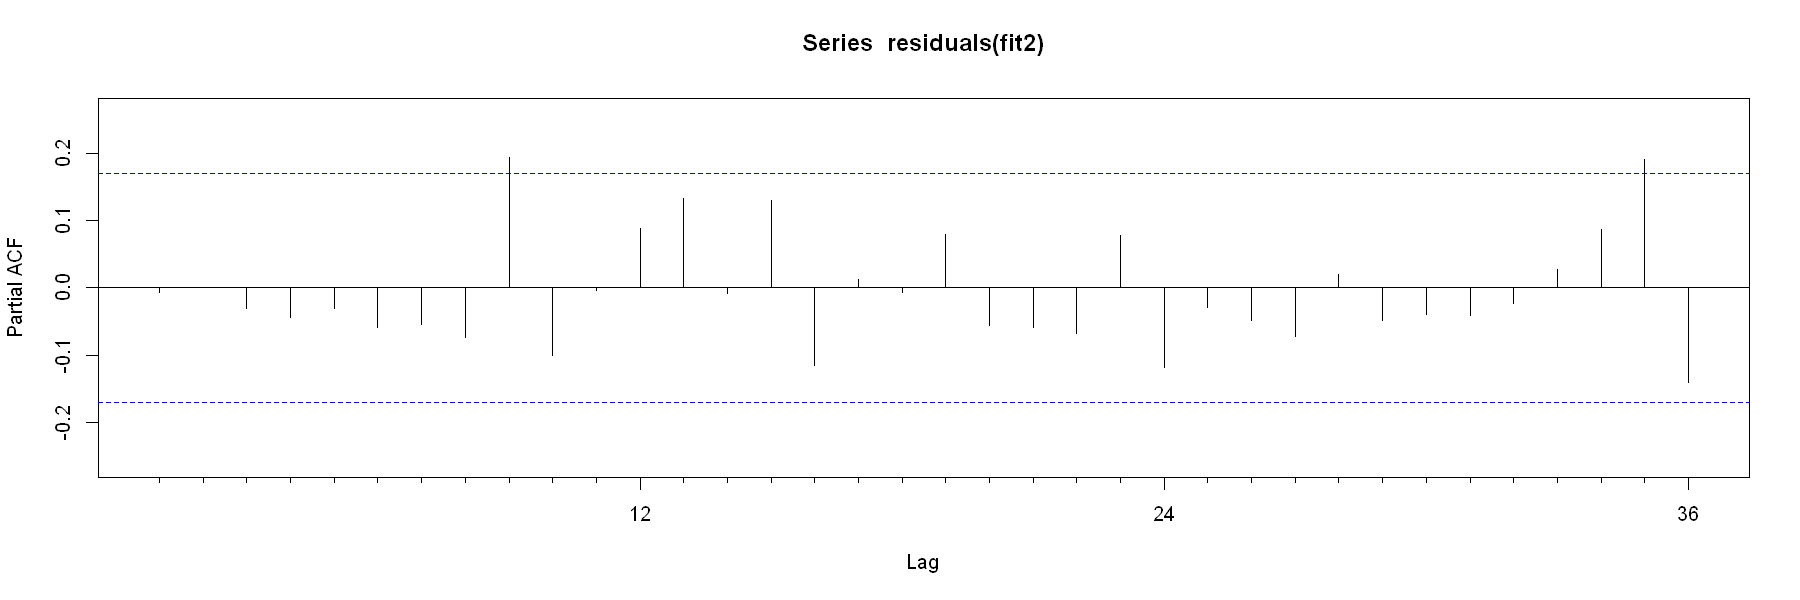

In [113]:
fit2<- Arima(train, order=c(0,1,2), seasonal = c(0,1,1))
print(paste('AICc:', fit2$aicc))
checkresiduals(fit2)
Pacf(residuals(fit2), 36)

We can see that the AICc for the second model actually went up, meaning the model did not improve. Additionally, the spikes did not disappear either. Let's experiment with adding to the seasonal component instead. Lets try **ARIMA(0,1,1)(0,1,2)[12]**.

[1] "AICc: 1531.12452994373"

	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,1,2)[12]
Q* = 19, df = 21, p-value = 0.5851

Model df: 3.   Total lags used: 24



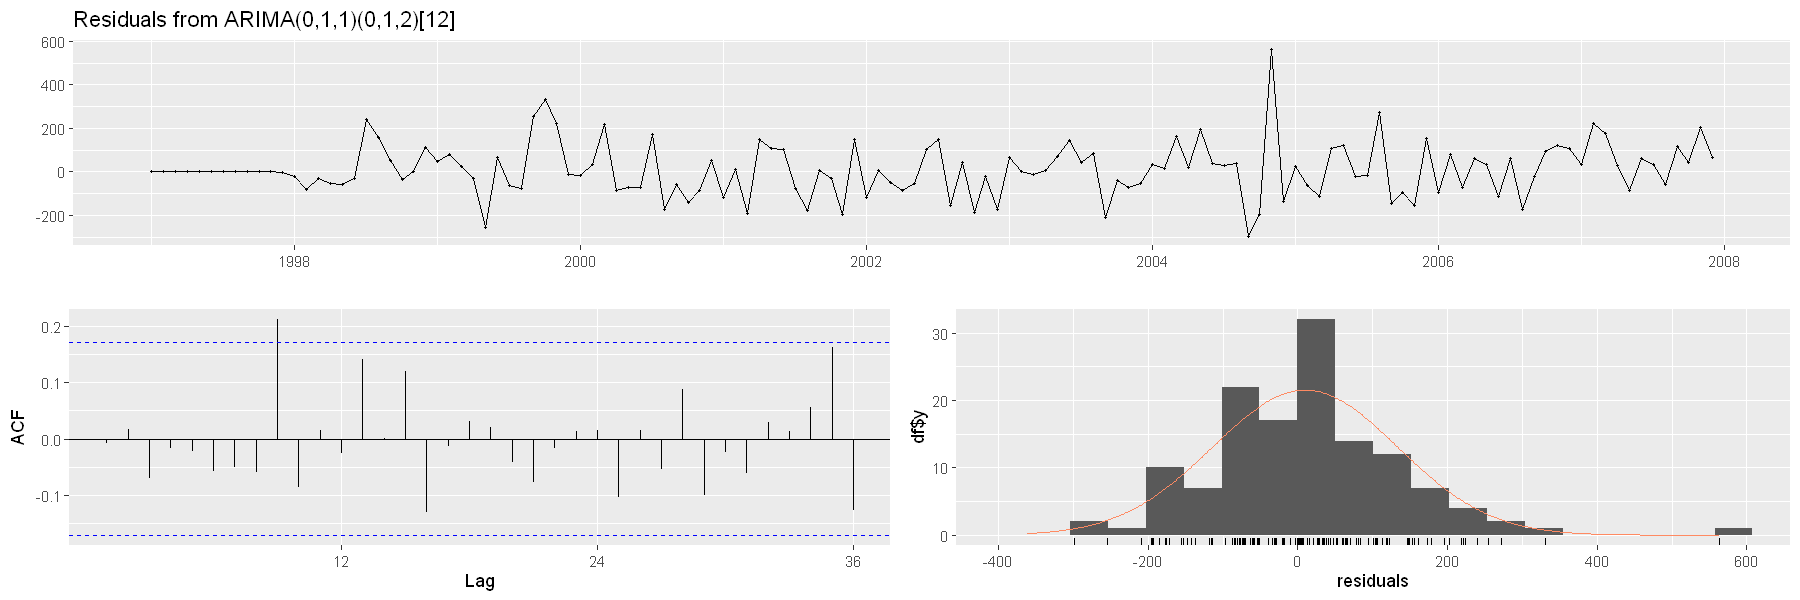

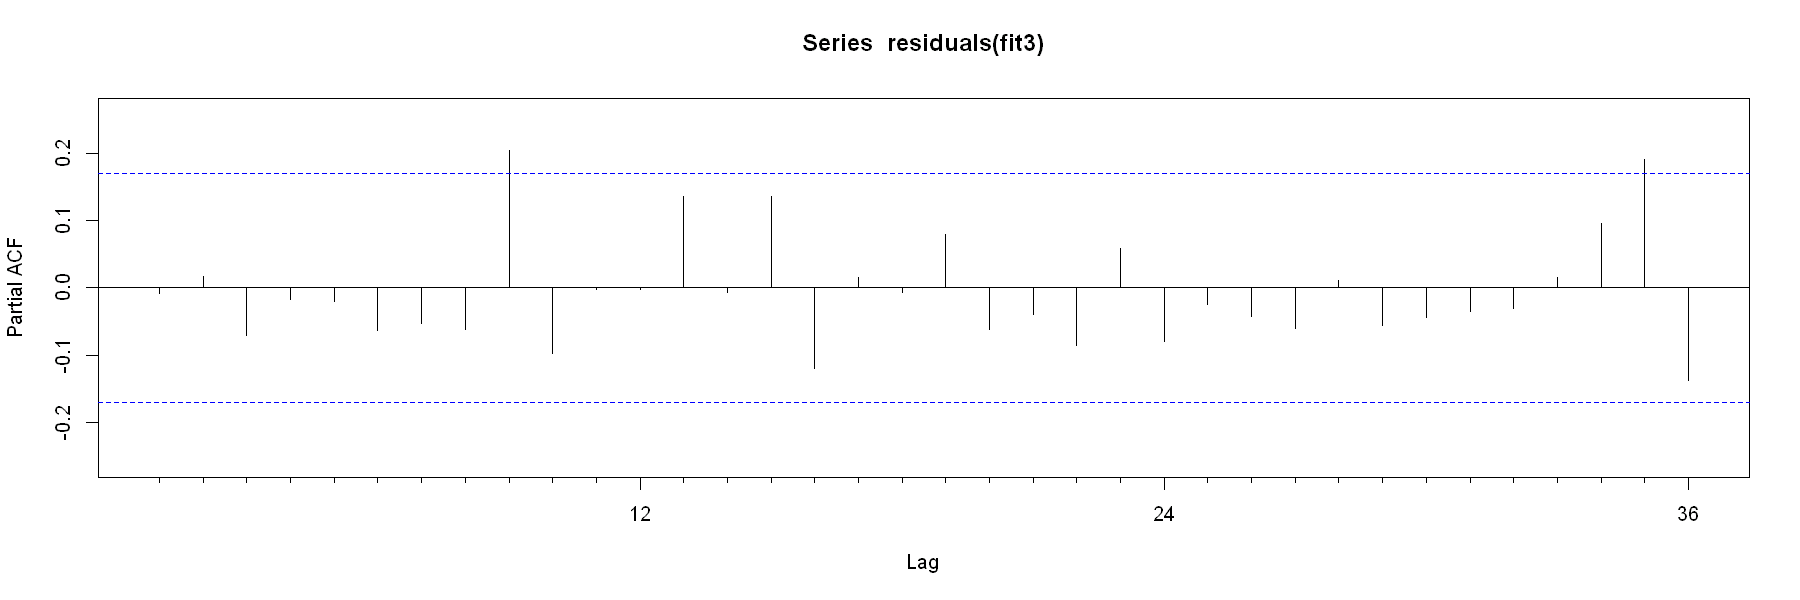

In [114]:
fit3<- Arima(train, order=c(0,1,1), seasonal = c(0,1,2))
print(paste('AICc:', fit3$aicc))
checkresiduals(fit3)
Pacf(residuals(fit3), 36)

The AICc slightly decreased, but spikes still remain, suggesting it might be due to external causes that cannot be captured by the model. Now lets test with AR compoents based off the PACF from before. First with **ARIMA(1,1,0)(1,1,0)[12]**.

[1] "AICc: 1550.45340549852"

	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)(1,1,0)[12]
Q* = 27.02, df = 22, p-value = 0.2104

Model df: 2.   Total lags used: 24



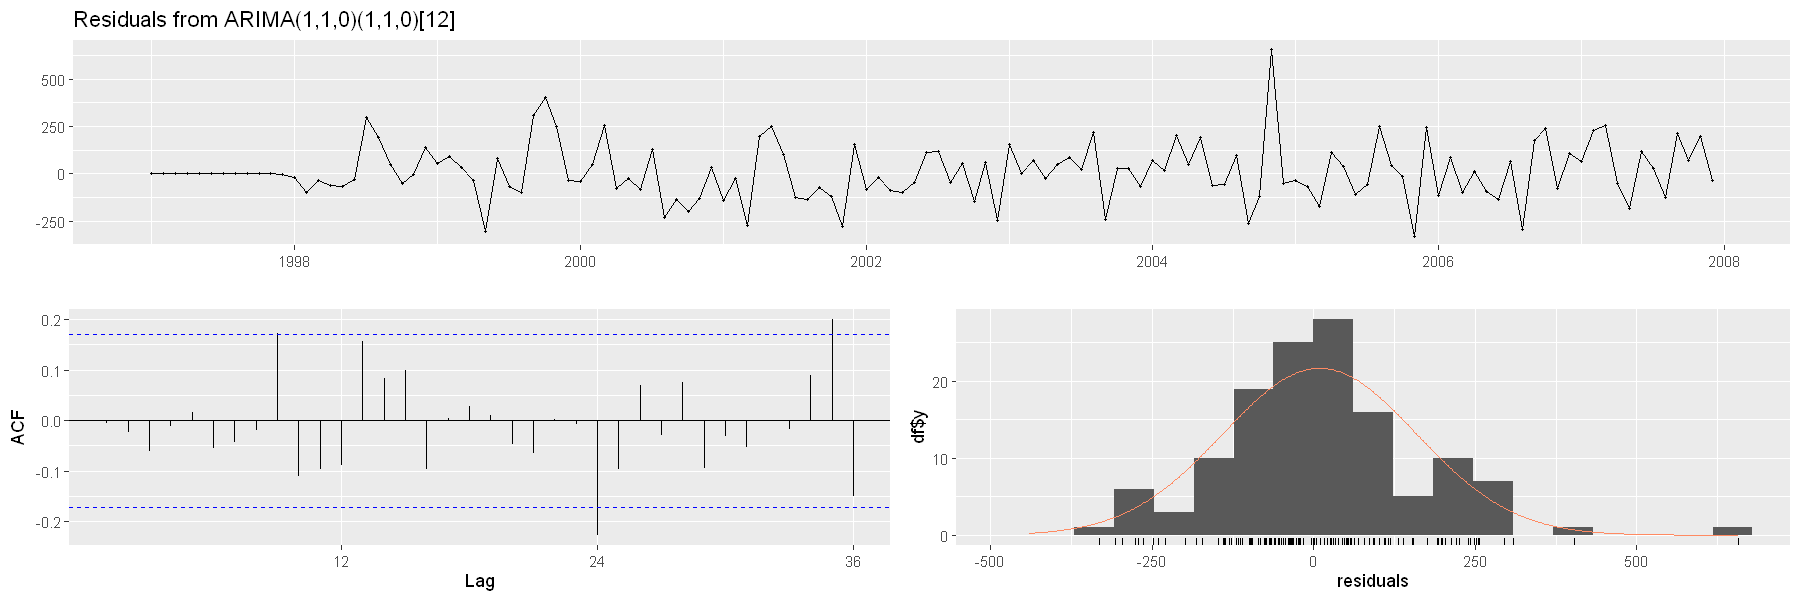

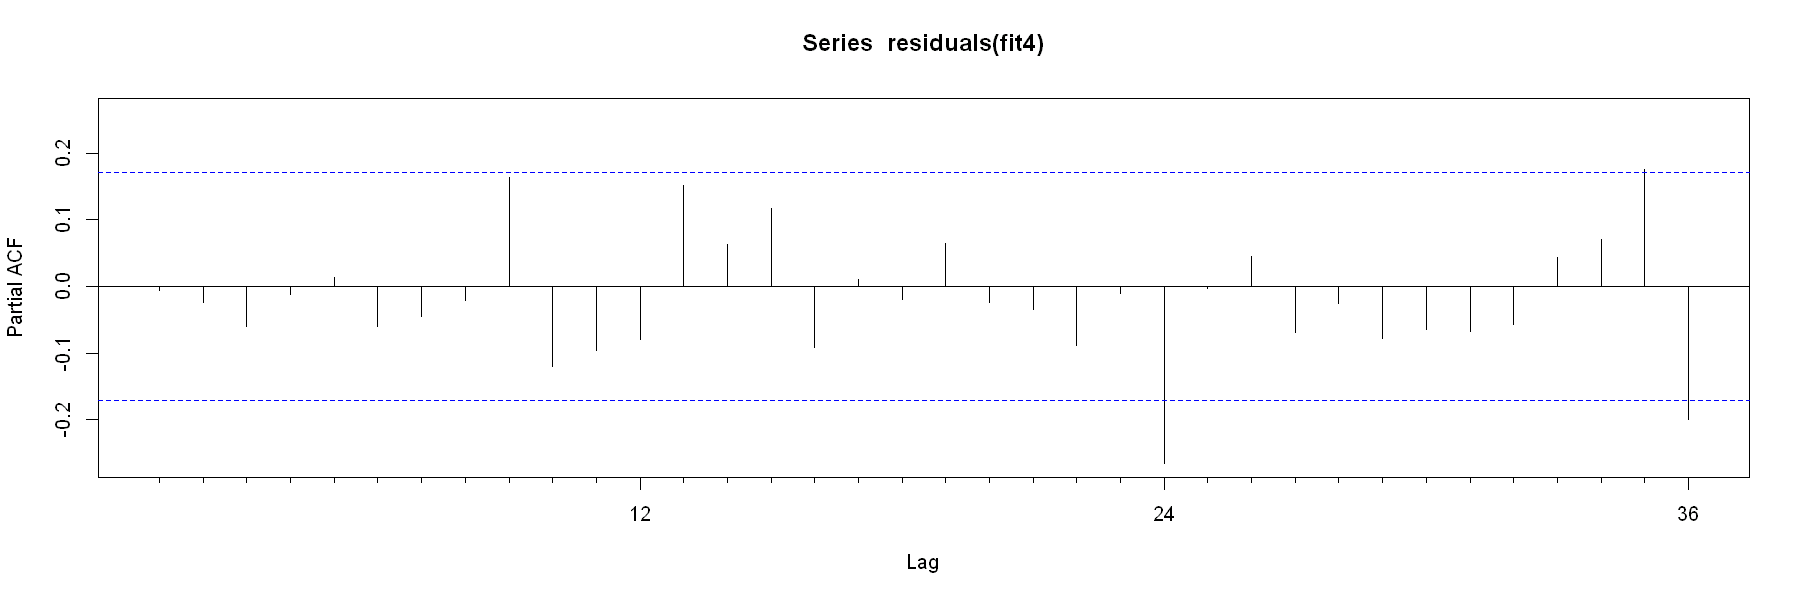

In [115]:
fit4<- Arima(train, order=c(1,1,0), seasonal = c(1,1,0))
print(paste('AICc:', fit4$aicc))
checkresiduals(fit4)
Pacf(residuals(fit4), 36)

Looking at the ACF of the residuals, there are still significant lag spikes at lag 24, indicating it needs additional seasonal terms in the model. The AICc increased from our previous models, suggesting we probably need the MA terms from earlier. Below we add a seasonal MA(1) back to capture the seasonal error because of the lag spike at 24. <br>
Thus we will look at **ARIMA(1,1,0)(1,1,1)[12]**.

[1] "AICc: 1530.94190726409"

	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)(1,1,1)[12]
Q* = 18.722, df = 21, p-value = 0.603

Model df: 3.   Total lags used: 24



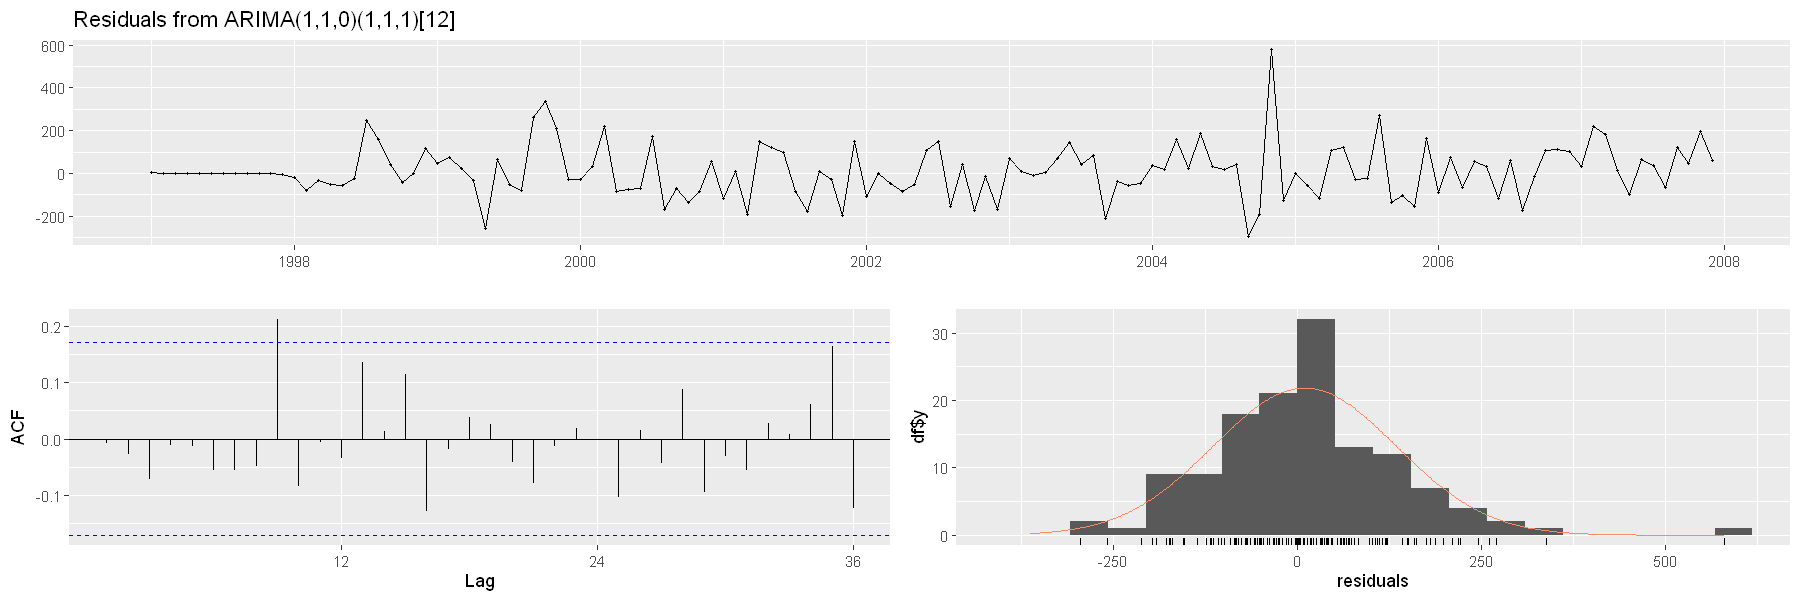

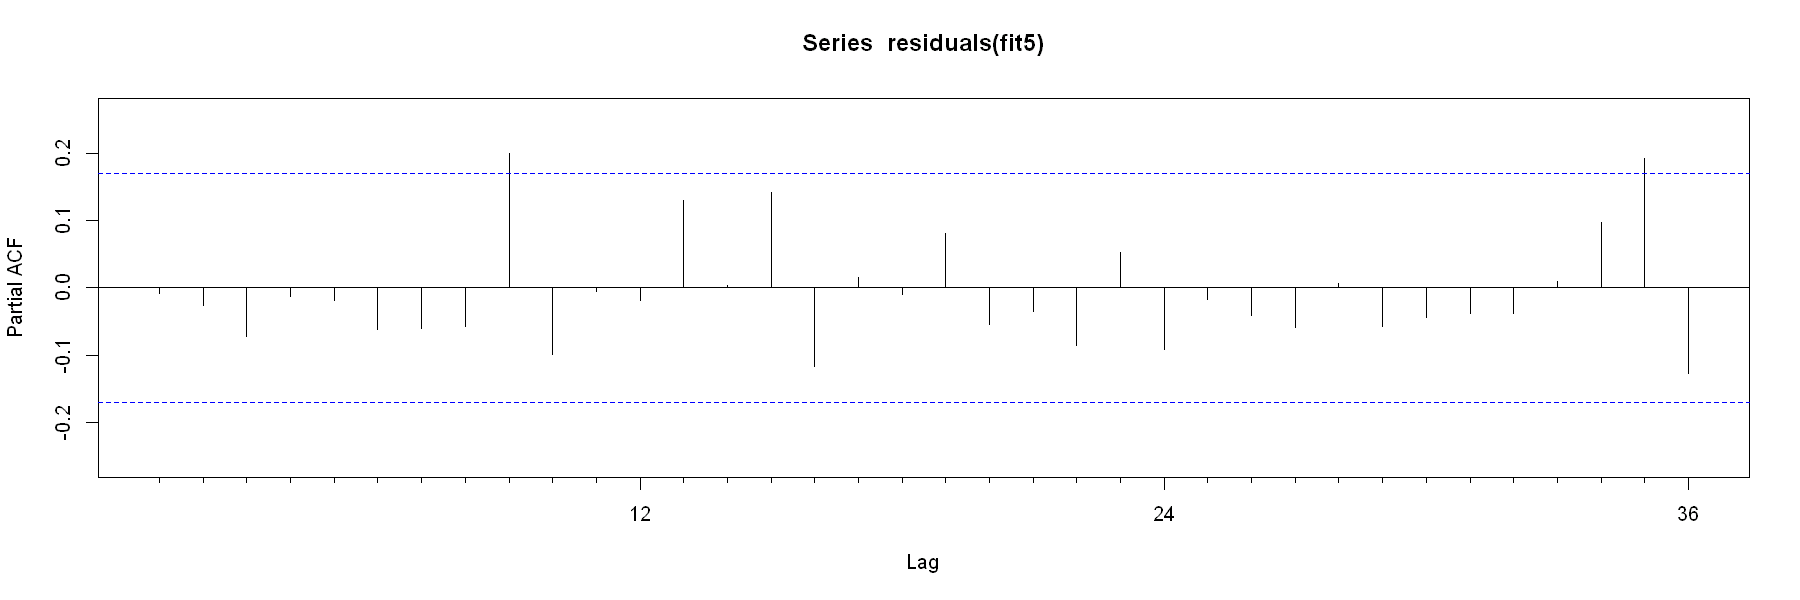

In [116]:
fit5<- Arima(train, order=c(1,1,0), seasonal = c(1,1,1))
print(paste('AICc:', fit5$aicc))
checkresiduals(fit5)
Pacf(residuals(fit5), 36)

We can see the AICc decrease from the previous model and is the lowest AICc thus far. The lag spike at 24 has disappeared, indicating the seasonal components are enough. There is only a lag spike at 9 remaining, indicating there is still some non-seasonal dependence at lag 9. Below we try adding a non-seasonal MA(1) term to see if it reduces the spike. The model is **ARIMA(1,1,1)(1,1,1)[12]**. 

[1] "AICc: 1533.10421255956"

	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)(1,1,1)[12]
Q* = 18.676, df = 20, p-value = 0.543

Model df: 4.   Total lags used: 24



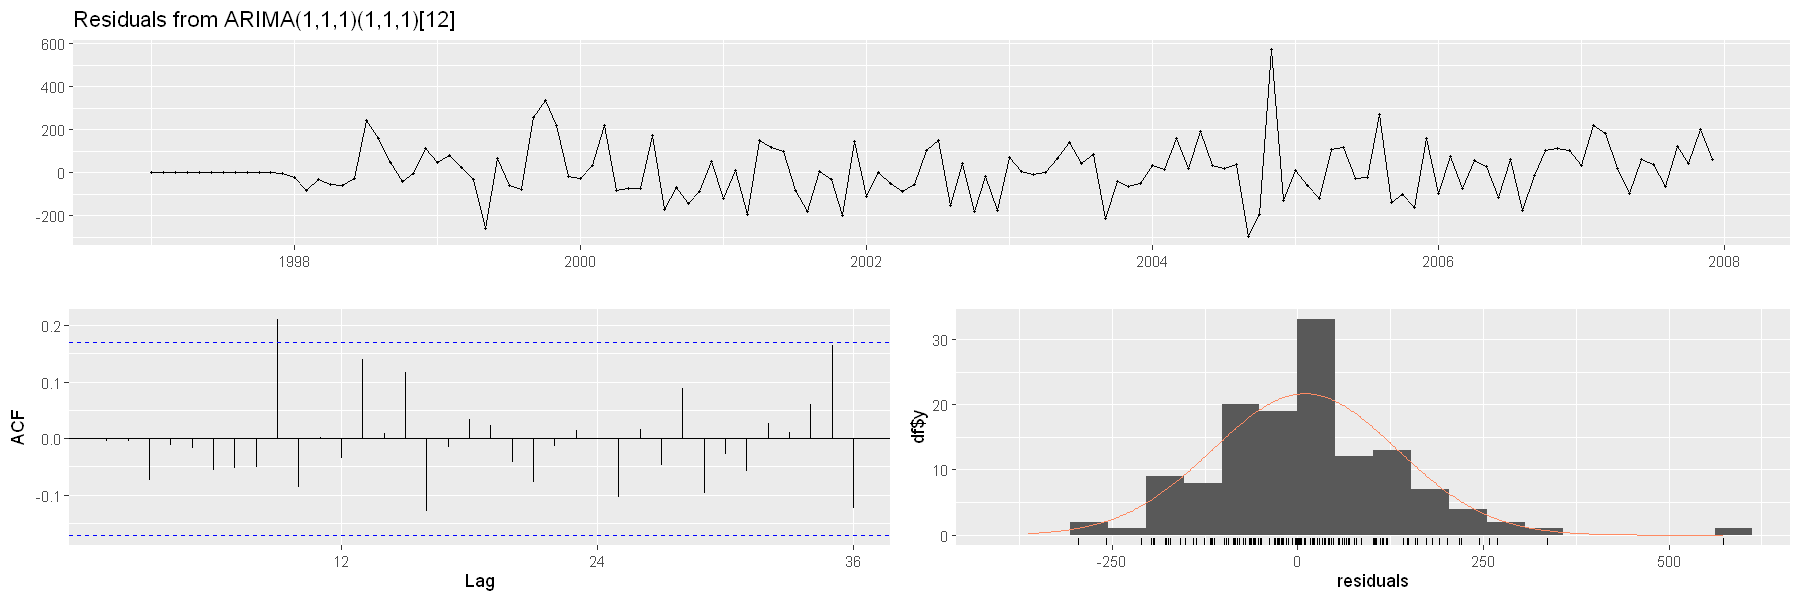

In [117]:
fit6<- Arima(train, order=c(1,1,1), seasonal = c(1,1,1))
print(paste('AICc:', fit6$aicc))
checkresiduals(fit6)

Here we still see the lag spike at 9, and the AICc did not improve. Consistent with earlier models, the spike at lag 9 does not seem to be removable with seasonal and non-seasonal AR or MA components. Since we used the same amount of differencing for all models, we summarize and compare our models using their AICc values and their error measures with the test set. 

In [118]:
method <- c("1. ARIMA(0,1,1)(0,1,1)[12]", "2. ARIMA(0,1,2)(0,1,1)[12]", "3. ARIMA(0,1,1)(0,1,2)[12]", "4. ARIMA(1,1,0)(1,1,0)[12]", 
            "5. ARIMA(1,1,0)(1,1,1)[12]", "6. ARIMA(1,1,1)(1,1,1)[12]", "Auto-ARIMA")
AICc <- c(fit1$aicc, fit2$aicc, fit3$aicc, fit4$aicc, fit5$aicc, fit6$aicc, auto$aicc)
table <- cbind(method, round(rbind(accuracy(forecast(fit1, length(test)), test)[2,c(2,3,5,6)], 
accuracy(forecast(fit2, length(test)), test)[2,c(2,3,5,6)],
accuracy(forecast(fit3, length(test)), test)[2,c(2,3,5,6)], 
accuracy(forecast(fit4, length(test)), test)[2,c(2,3,5,6)],
accuracy(forecast(fit5, length(test)), test)[2,c(2,3,5,6)],
accuracy(forecast(fit6, length(test)), test)[2,c(2,3,5,6)],
accuracy(forecast(auto, length(test)), test)[2,c(2,3,5,6)]
), 2),AICc)

table

method,RMSE,MAE,MAPE,MASE,AICc
"1. ARIMA(0,1,1)(0,1,1)[12]",161.63,128.23,1.67,0.48,1531.20562697534
"2. ARIMA(0,1,2)(0,1,1)[12]",161.33,127.82,1.66,0.48,1533.34629653832
"3. ARIMA(0,1,1)(0,1,2)[12]",167.64,128.58,1.69,0.49,1531.12452994373
"4. ARIMA(1,1,0)(1,1,0)[12]",678.12,586.74,7.62,2.21,1550.45340549852
"5. ARIMA(1,1,0)(1,1,1)[12]",172.51,125.39,1.66,0.47,1530.94190726409
"6. ARIMA(1,1,1)(1,1,1)[12]",170.33,124.17,1.64,0.47,1533.10421255956
Auto-ARIMA,532.03,459.58,5.99,1.73,1548.24763972014


The top models based off AICc value are models 1, 2, 3, and 5. These four models had the lowest and very similar AICc values, indicating a better fit. Even though model 6 had significantly lower AICc score, it  was not included because of the much higher error values. 

Lets look at the top models mentioned: 

In [119]:
table[c(1,2,3,5),]

method,RMSE,MAE,MAPE,MASE,AICc
"1. ARIMA(0,1,1)(0,1,1)[12]",161.63,128.23,1.67,0.48,1531.20562697534
"2. ARIMA(0,1,2)(0,1,1)[12]",161.33,127.82,1.66,0.48,1533.34629653832
"3. ARIMA(0,1,1)(0,1,2)[12]",167.64,128.58,1.69,0.49,1531.12452994373
"5. ARIMA(1,1,0)(1,1,1)[12]",172.51,125.39,1.66,0.47,1530.94190726409


The AICc values are relatively similar across the four models, with the exception of model 2 being relatively higher than the rest. Using AICc, it would determine model 5 as the best model with the best fit. The error metrics for the models are also relatively similar, model 2 with the lowest RMSE and model 5 with the lowest MAE. In order to have the best balance of predictive accuracy and low AICc, we believe model 1 **ARIMA(0,1,1)(0,1,1)[12]** would be the best model as it is close to the lowest AICc while having low test errors compared to the other models. 